In [1]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array
#from keras.preprocessing.image import list_pictures, load_img, ImageDataGenerator
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.applications import imagenet_utils
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import datetime, time, os

In [2]:
def list_pictures(path):
    from glob import glob
    r = glob(os.path.join(path, '*.png'))
    assert len(r) != 0
    return r

In [3]:
X = []
Y = []

number_list = os.listdir('./numberimg/imgs')
number_list_count = 0

for number in number_list:
    for picture in list_pictures('./numberimg/imgs/{0}'.format(number)):
        img = img_to_array(load_img(picture, target_size=(64, 64)))
        X.append(img)
        Y.append(number_list_count)
        #print(picture)
    number_list_count += 1

X = np.asarray(X)
Y = np.asarray(Y)
output_classes = number_list_count

print(number_list)
print(number_list_count)
print(Y)

['1283', '1313', '1349', '1407', '1557', '1752', '1760', '1766', '1772', '1860', '2142', '2162', '2181', '2310', '2366', '2450', '2498', '2613', '2690', '2751', '2795', '2819', '2876', '2935', '2977', '2983', '2990', '2996', '3004', '3159', '3290', '3325', '3328', '3524', '3682', '3715', '3765', '3839', '3853', '3891', '4189', '4401', '4512', '4600', '4601', '4776', '4955', '4964', '5037', '5066', '5208', '5262', '5293', '5477', '5481', '5502', '5652', '5882', '5928', '5953', '5956', '6243', '6263', '6310', '6311', '6357', '6365', '6480', '6554', '6662', '6666', '6686', '6696', '6744', '7089', '7142', '7304', '7308', '7324', '7340', '7521', '7640', '7772', '7886', '8008', '8143', '8239', '8481', '8498', '8579', '8611', '8926', '9049', '9119', '9399', '9835', '9864', '9865', '9929']
99
[ 0  0  0 ... 98 98 98]


In [4]:
X = X.astype('float32')
X = X / 255.0

Y = np_utils.to_categorical(Y, output_classes)

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

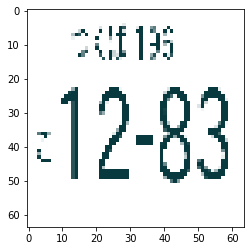

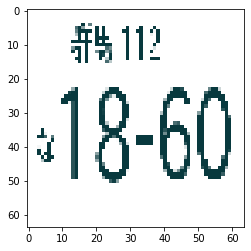

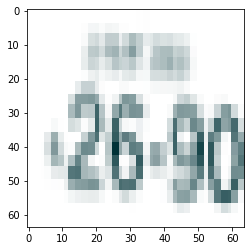

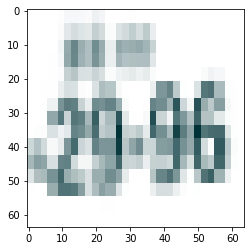

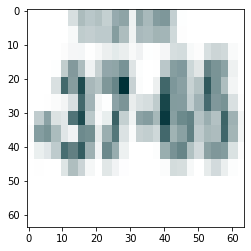

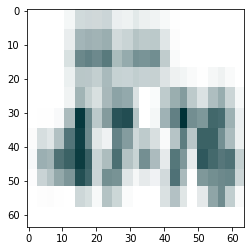

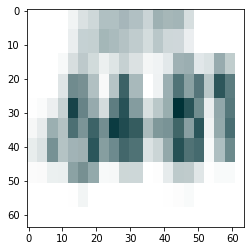

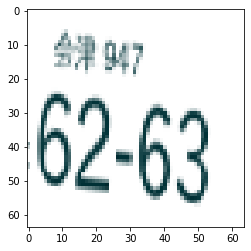

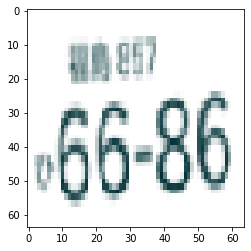

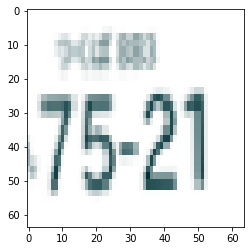

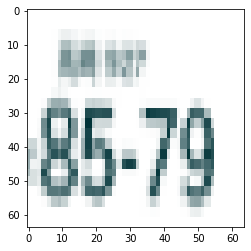

In [5]:
c = X.shape[0]
for i in range(0, c, 1000):
    plt.imshow(X[i])
    plt.show()

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(output_classes))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        9

In [7]:
filename = 'resizeO10'
filename = "./weight/{0}_{1}.hdf5".format(filename, datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S"))
if not os.path.exists('./weight'):
    os.makedirs('./weight')
if os.path.exists(filename):
    raise ValueError("[!!] File name collision detected !")

print(datetime.datetime.now())
start_time = time.time()
history = model.fit(x_train, y_train, batch_size=5, epochs=20,
                    validation_data = (x_test, y_test), verbose=1)
print(datetime.datetime.now())
print(time.time() - start_time)

model.save_weights(filename)

2020-12-23 23:14:57.511238
Epoch 1/20
1474/1474 [==============================] - 66s 45ms/step - loss: 4.6003 - accuracy: 0.0135 - val_loss: 4.5952 - val_accuracy: 0.0174
Epoch 2/20
1474/1474 [==============================] - 64s 43ms/step - loss: 4.5944 - accuracy: 0.0180 - val_loss: 4.5962 - val_accuracy: 0.0174
Epoch 3/20
1474/1474 [==============================] - 62s 42ms/step - loss: 4.5931 - accuracy: 0.0188 - val_loss: 4.5966 - val_accuracy: 0.0174
Epoch 4/20
1474/1474 [==============================] - 65s 44ms/step - loss: 4.5921 - accuracy: 0.0194 - val_loss: 4.5976 - val_accuracy: 0.0174
Epoch 5/20
1474/1474 [==============================] - 66s 45ms/step - loss: 4.5905 - accuracy: 0.0196 - val_loss: 4.5977 - val_accuracy: 0.0174
Epoch 6/20
1474/1474 [==============================] - 62s 42ms/step - loss: 4.5926 - accuracy: 0.0168 - val_loss: 4.5987 - val_accuracy: 0.0174
Epoch 7/20
1474/1474 [==============================] - 61s 42ms/step - loss: 4.5891 - accuracy: 

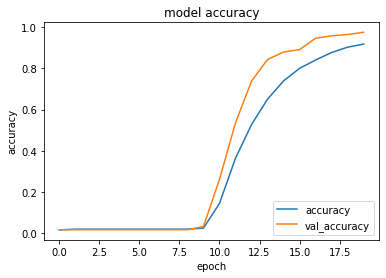

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

In [9]:
predict_classes = model.predict_classes(x_test, verbose=1)
mg_df = pd.DataFrame({'predict':predict_classes, 'class':np.argmax(y_test, axis=1)})
pd.crosstab(mg_df['class'], mg_df['predict'])

/home/suzuki/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


114/114 [==============================] - 3s 26ms/step


predict,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
class,,,,,,,,,,,,,,,,,,,,,
0,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,34,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,31,0,0


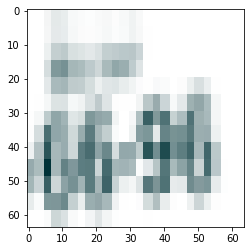

6696
predict : 6696


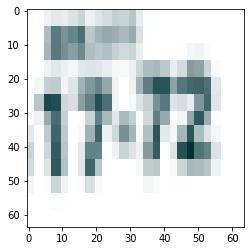

1772
predict : 1772


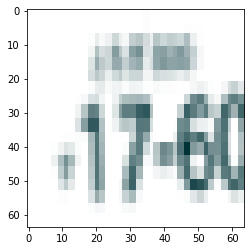

1760
predict : 1760


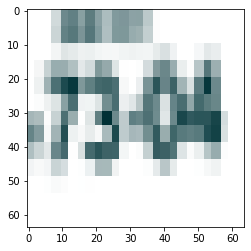

7304
predict : 7304


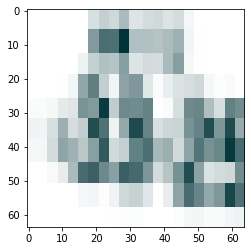

3325
predict : 5208
[!!] Wrong Answer


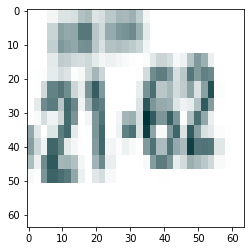

2162
predict : 2162


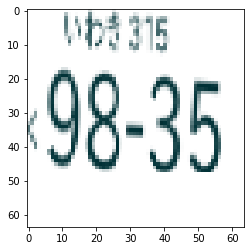

9835
predict : 9835


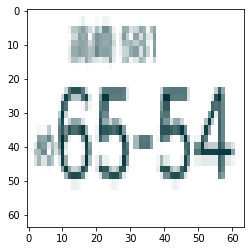

6554
predict : 6554


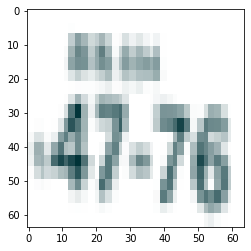

4776
predict : 4776


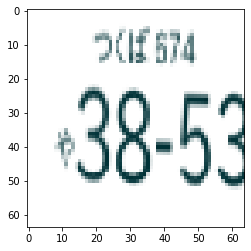

3853
predict : 3853


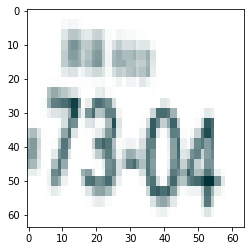

7304
predict : 7304


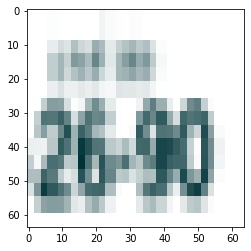

2690
predict : 2690


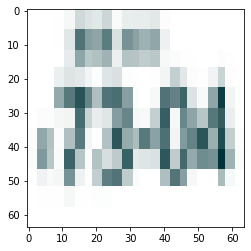

7304
predict : 7304


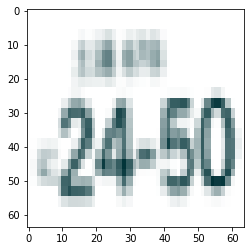

2450
predict : 2450


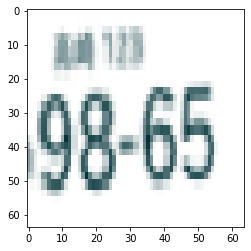

9865
predict : 9865


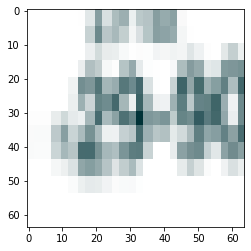

2990
predict : 2996
[!!] Wrong Answer


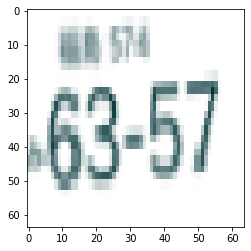

6357
predict : 6357


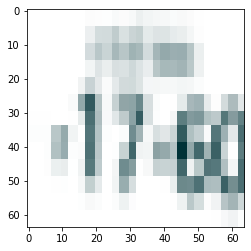

1760
predict : 1760


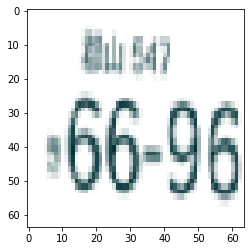

6696
predict : 6696


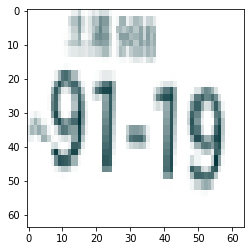

9119
predict : 9119


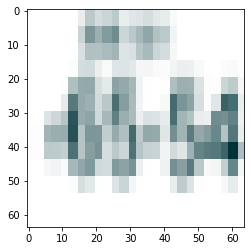

6554
predict : 6554


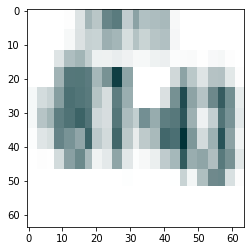

8143
predict : 8143


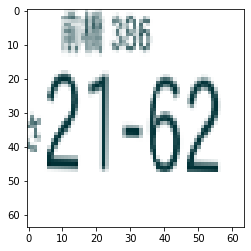

2162
predict : 2162


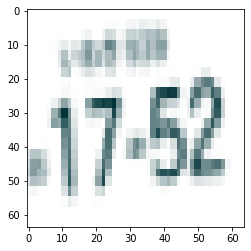

1752
predict : 1752


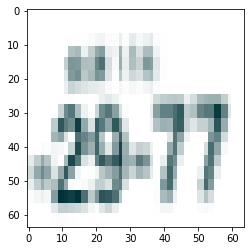

2977
predict : 2977


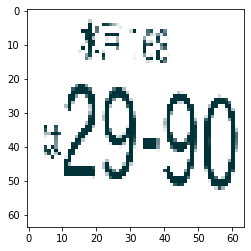

2990
predict : 2990


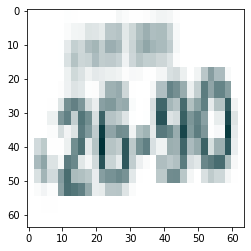

2690
predict : 2690


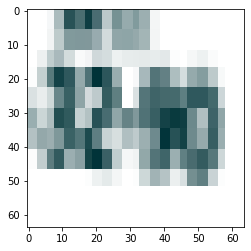

3290
predict : 3290


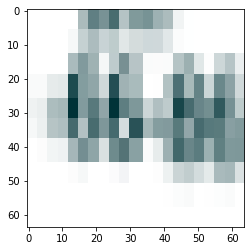

6686
predict : 6696
[!!] Wrong Answer


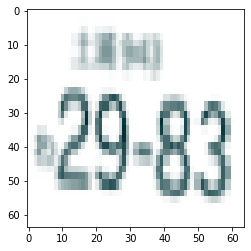

2983
predict : 2983


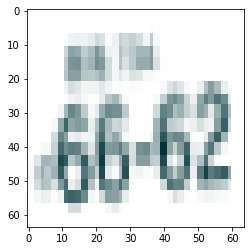

6662
predict : 6662


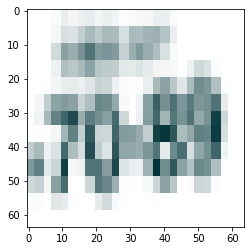

7089
predict : 7089


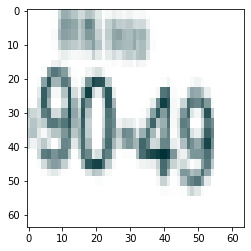

9049
predict : 9049


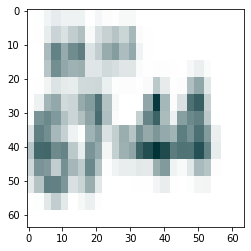

6744
predict : 6744


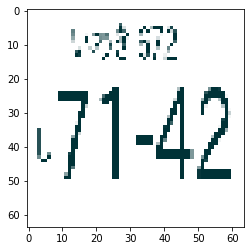

7142
predict : 7142


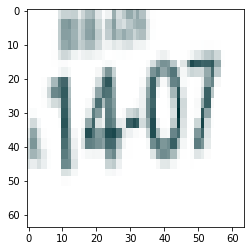

1407
predict : 1407


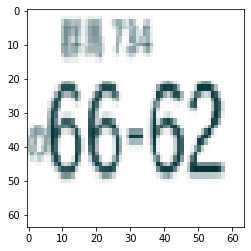

6662
predict : 6662


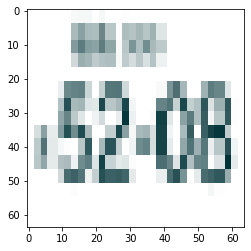

5208
predict : 5208


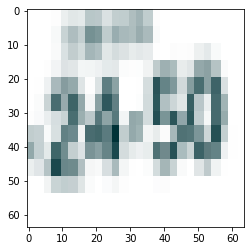

2450
predict : 2450


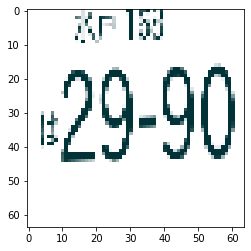

2990
predict : 2990


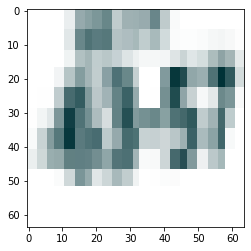

6357
predict : 6357


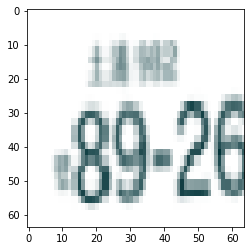

8926
predict : 8926


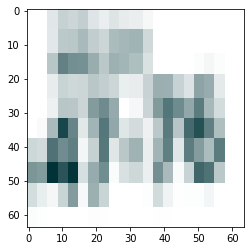

4776
predict : 4776


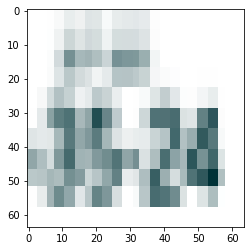

3524
predict : 7324
[!!] Wrong Answer


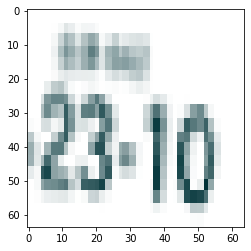

2310
predict : 2310


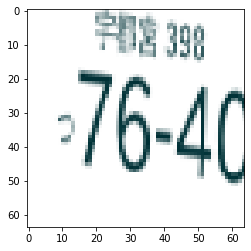

7640
predict : 7640


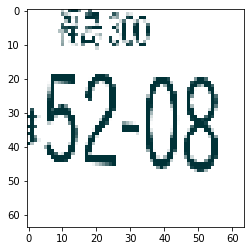

5208
predict : 5208


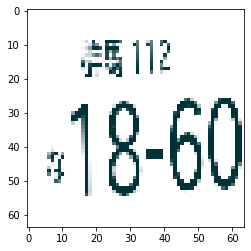

1860
predict : 7886
[!!] Wrong Answer


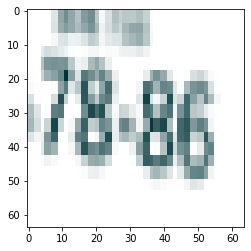

7886
predict : 7886


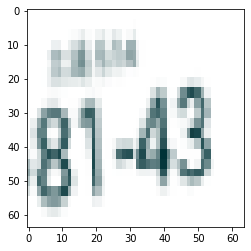

8143
predict : 8143


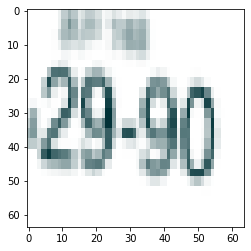

2990
predict : 2990


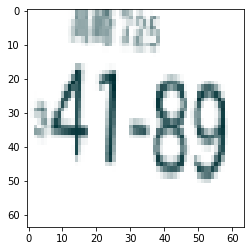

4189
predict : 4189


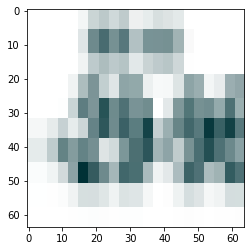

2996
predict : 2996


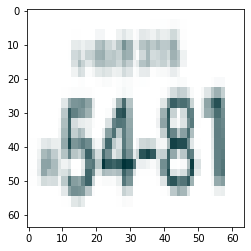

5481
predict : 5481


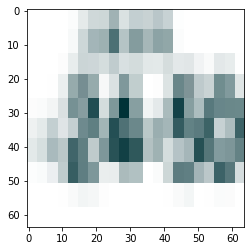

2450
predict : 2450


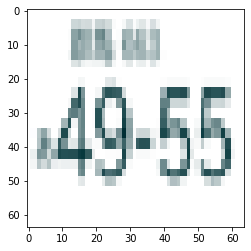

4955
predict : 4955


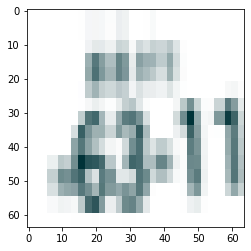

6311
predict : 6311


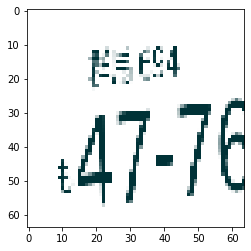

4776
predict : 4776


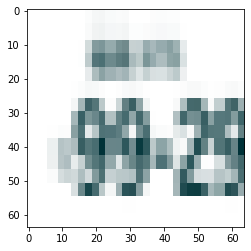

9929
predict : 9929


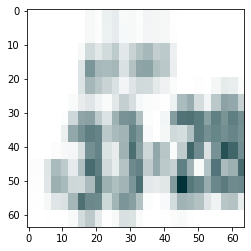

3328
predict : 3328


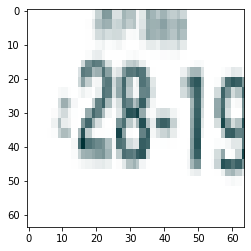

2819
predict : 2819


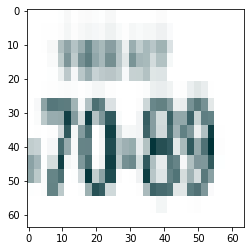

7089
predict : 7089


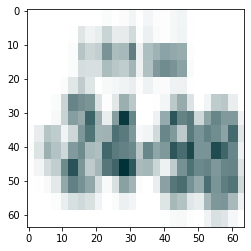

2498
predict : 2498


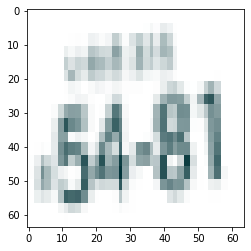

5481
predict : 5481


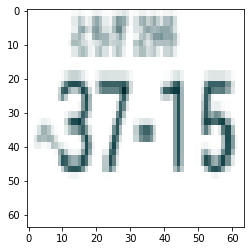

3715
predict : 3715


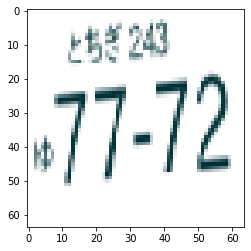

7772
predict : 7772


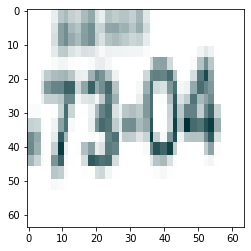

7304
predict : 7304


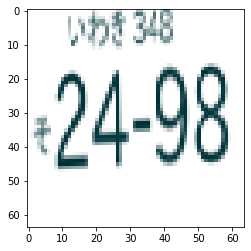

2498
predict : 2498


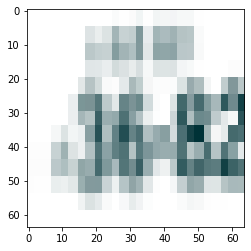

3682
predict : 3682


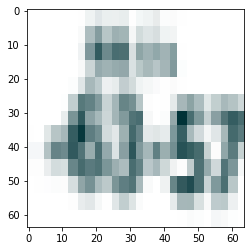

6357
predict : 6357


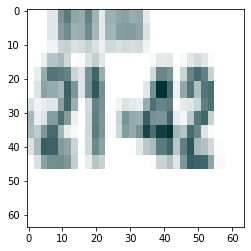

2142
predict : 2142


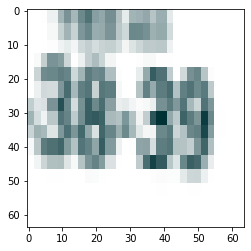

3839
predict : 3839


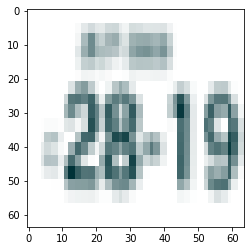

2819
predict : 2819


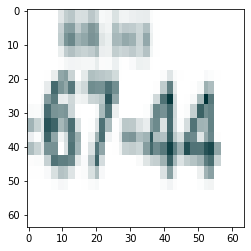

6744
predict : 6744


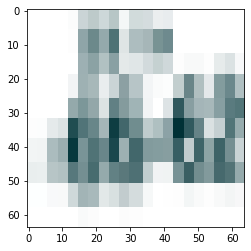

6662
predict : 6662


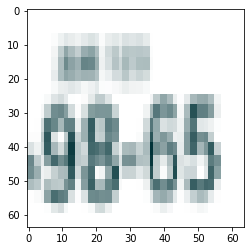

9865
predict : 9864
[!!] Wrong Answer


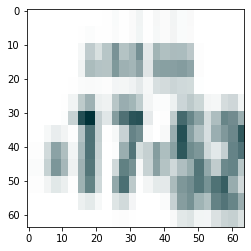

1752
predict : 1752


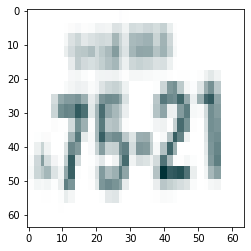

7521
predict : 7521


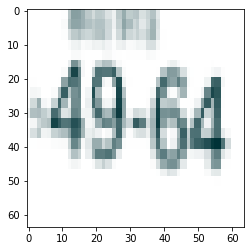

4964
predict : 4964


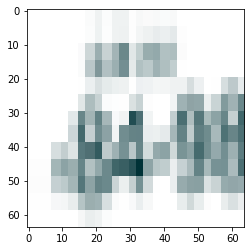

8498
predict : 8498


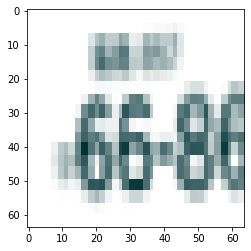

6686
predict : 6686


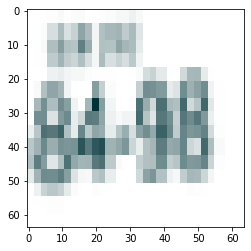

8498
predict : 8498


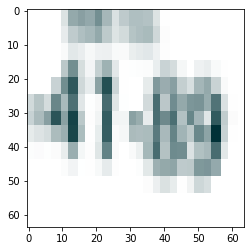

4189
predict : 4189


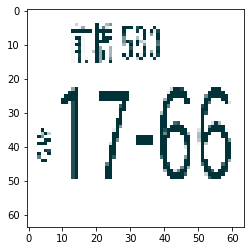

1766
predict : 1766


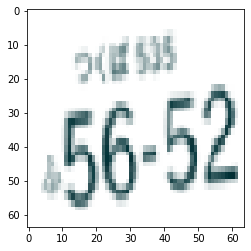

5652
predict : 5652


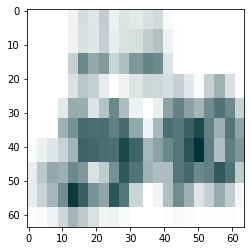

2990
predict : 2996
[!!] Wrong Answer


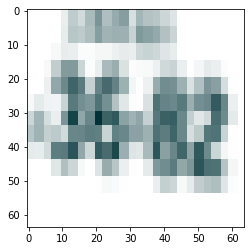

3682
predict : 3682


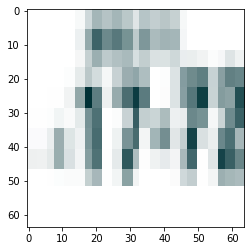

1772
predict : 1772


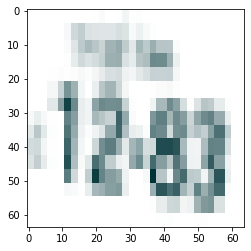

1283
predict : 1283


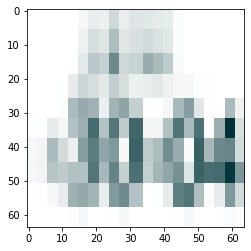

3004
predict : 3004


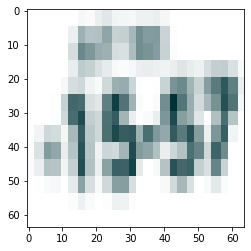

1557
predict : 1557


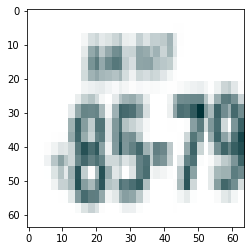

8579
predict : 8579


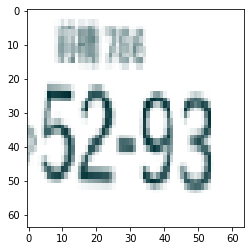

5293
predict : 5293


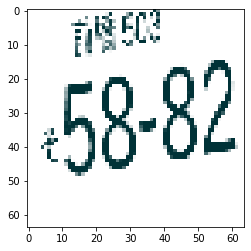

5882
predict : 5882


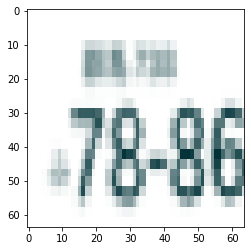

7886
predict : 7886


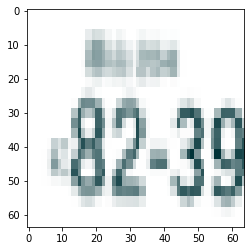

8239
predict : 8239


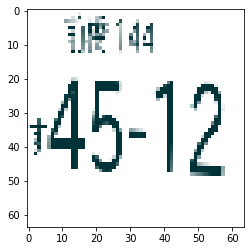

4512
predict : 4512


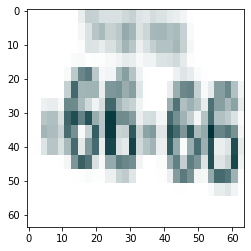

6666
predict : 6666


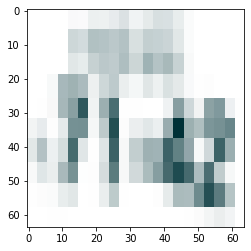

7142
predict : 7142


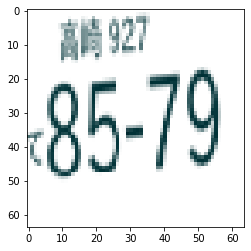

8579
predict : 8579


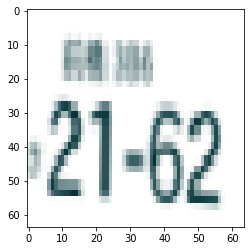

2162
predict : 2162


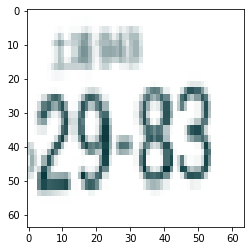

2983
predict : 2983


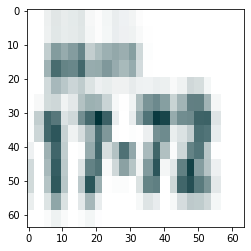

1772
predict : 1772


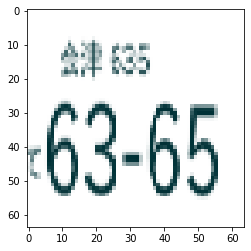

6365
predict : 6365


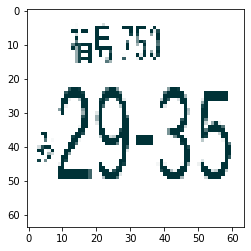

2935
predict : 2935


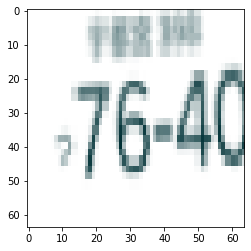

7640
predict : 7640


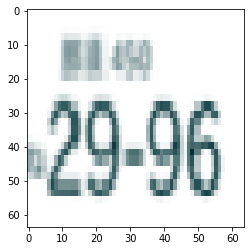

2996
predict : 2996


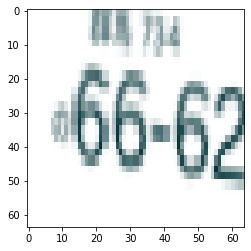

6662
predict : 6662


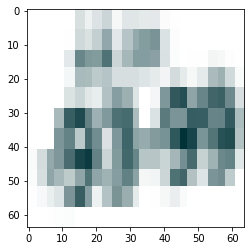

9399
predict : 9399


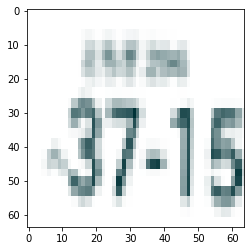

3715
predict : 3715


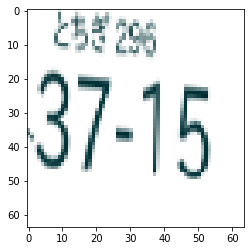

3715
predict : 3715


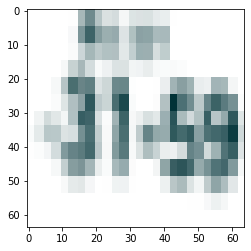

3159
predict : 3159


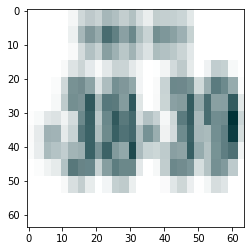

3839
predict : 3839


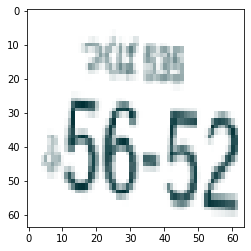

5652
predict : 5652


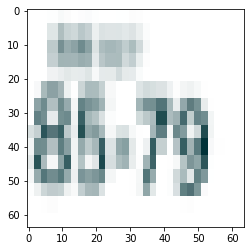

8579
predict : 8579


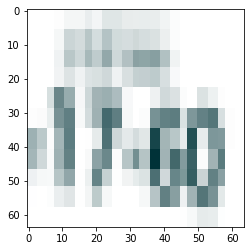

1760
predict : 1760


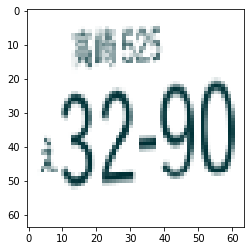

3290
predict : 3290


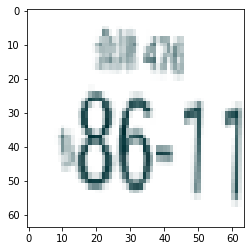

8611
predict : 8611


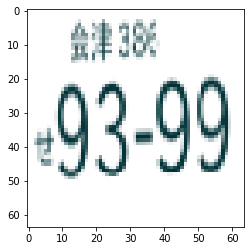

9399
predict : 9399


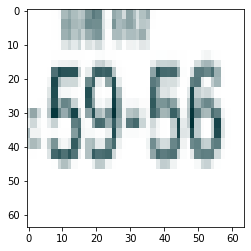

5956
predict : 5956


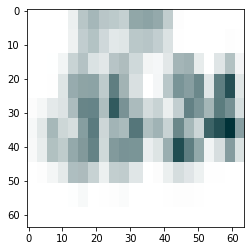

3524
predict : 3524


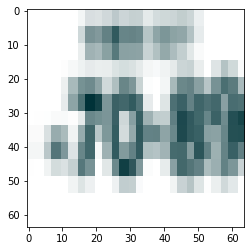

7089
predict : 7089


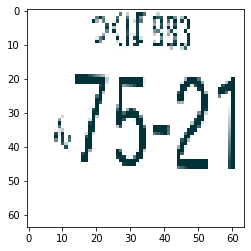

7521
predict : 7521


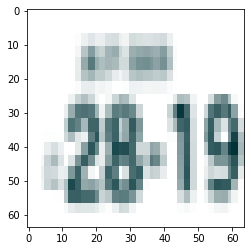

2819
predict : 2819


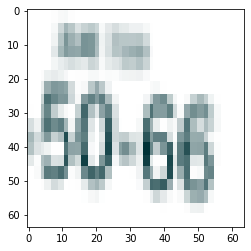

5066
predict : 5066


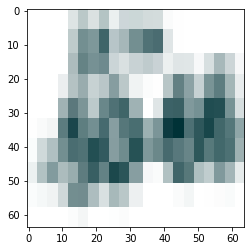

5066
predict : 6696
[!!] Wrong Answer


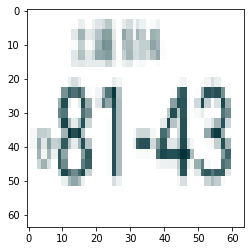

8143
predict : 8143


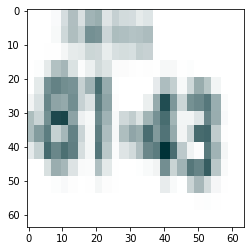

8143
predict : 8143


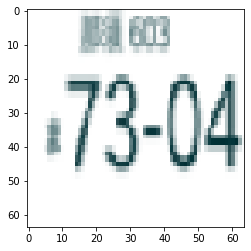

7304
predict : 7304


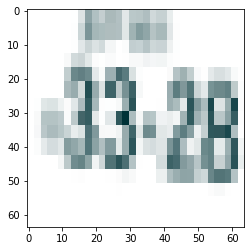

3328
predict : 3328


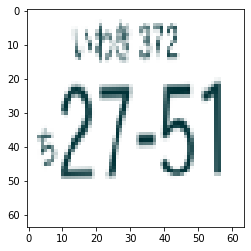

2751
predict : 2751


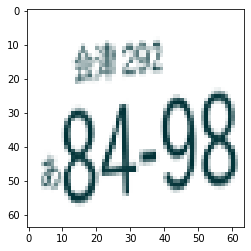

8498
predict : 8498


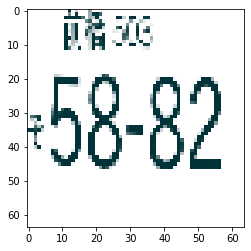

5882
predict : 5882


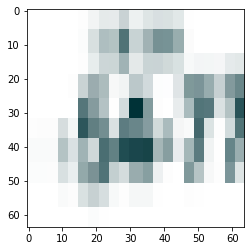

5477
predict : 5477


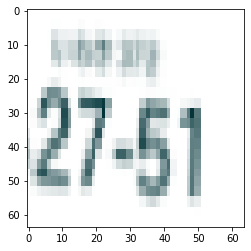

2751
predict : 2751


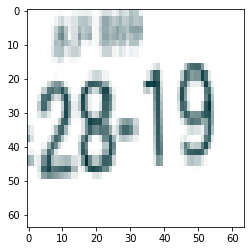

2819
predict : 2819


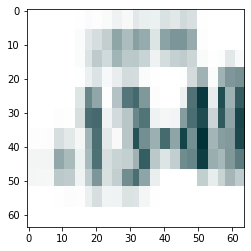

1349
predict : 1349


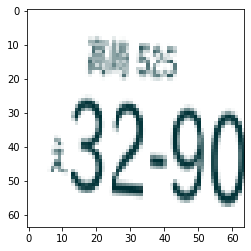

3290
predict : 3290


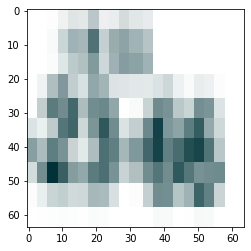

2366
predict : 2366


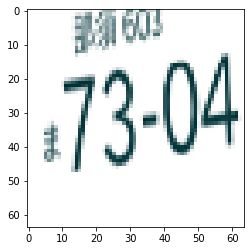

7304
predict : 7304


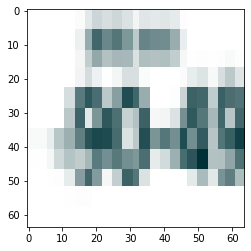

9049
predict : 9049


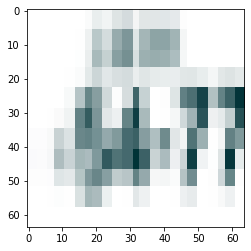

5477
predict : 5477


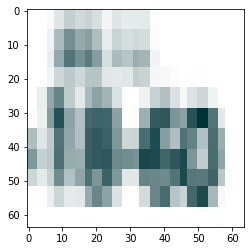

1860
predict : 1860


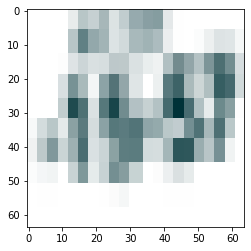

1557
predict : 1557


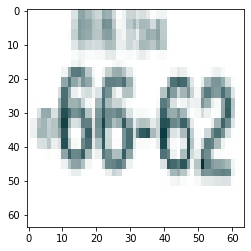

6662
predict : 6662


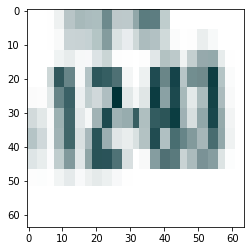

1283
predict : 1283


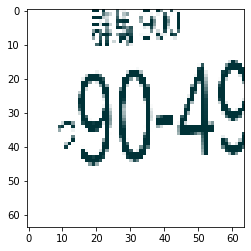

9049
predict : 9049


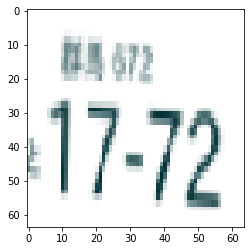

1772
predict : 1772


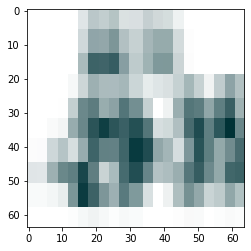

2935
predict : 2935


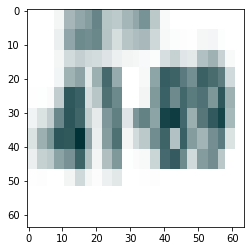

4189
predict : 4189


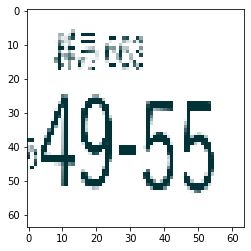

4955
predict : 4955


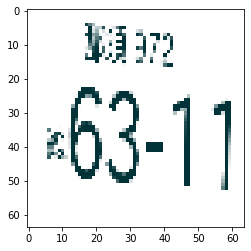

6311
predict : 6311


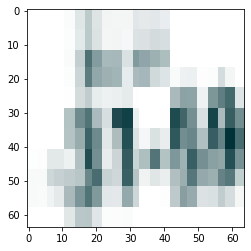

3159
predict : 3159


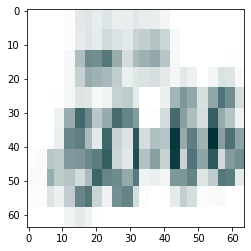

5066
predict : 5066


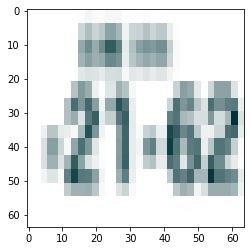

2162
predict : 2162


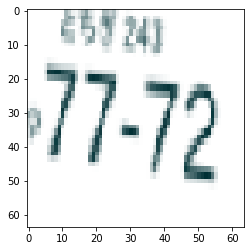

7772
predict : 7772


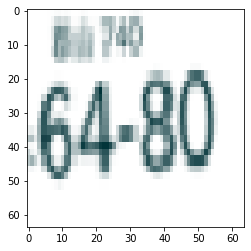

6480
predict : 6480


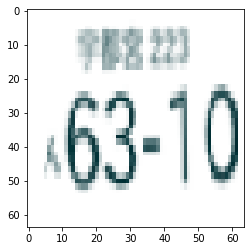

6310
predict : 6310


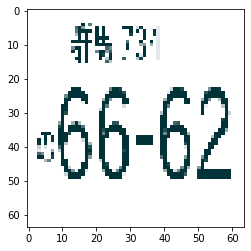

6662
predict : 6662


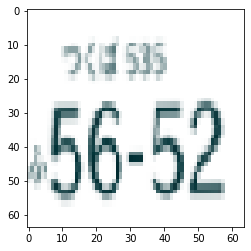

5652
predict : 5652


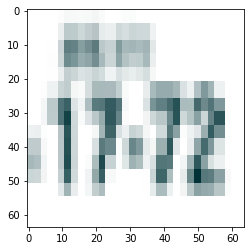

1772
predict : 1772


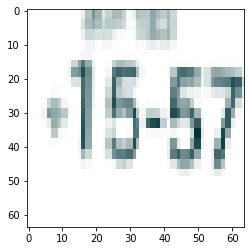

1557
predict : 1557


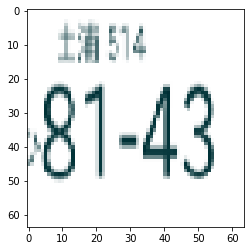

8143
predict : 8143


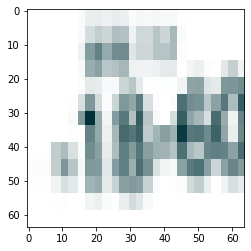

1860
predict : 1860


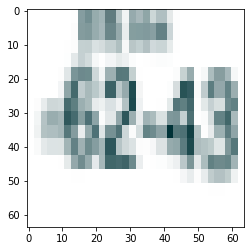

6243
predict : 6243


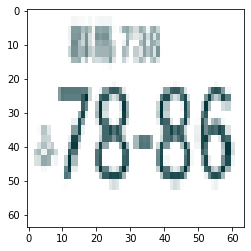

7886
predict : 7886


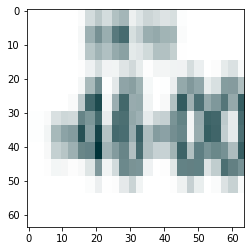

4600
predict : 4600


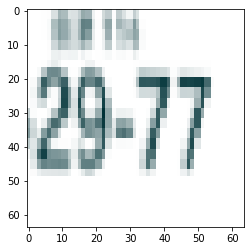

2977
predict : 2977


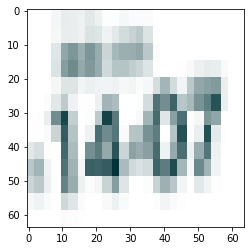

1407
predict : 1407


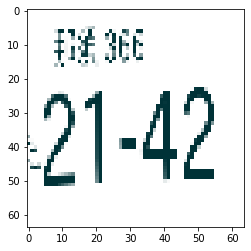

2142
predict : 2142


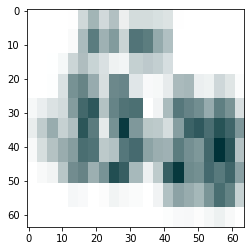

3328
predict : 3328


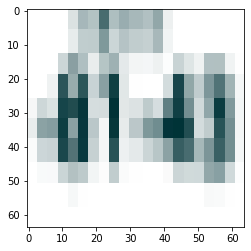

8143
predict : 8143


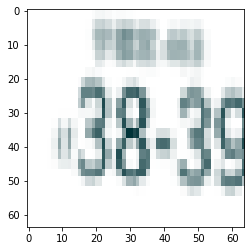

3839
predict : 3839


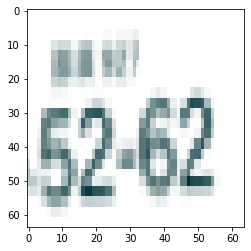

5262
predict : 5262


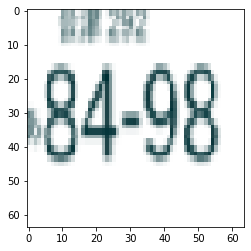

8498
predict : 8498


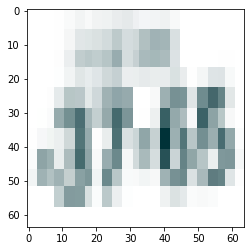

3765
predict : 2795
[!!] Wrong Answer


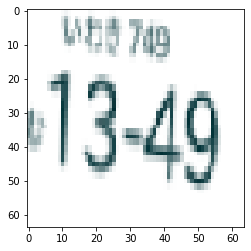

1349
predict : 1349


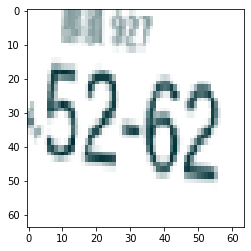

5262
predict : 5262


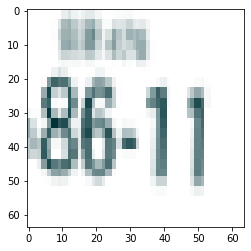

8611
predict : 8611


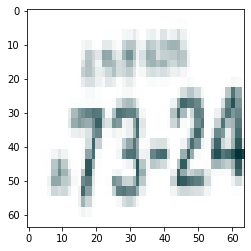

7324
predict : 7324


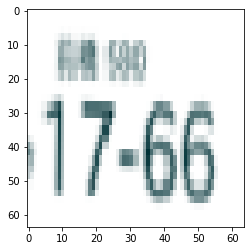

1766
predict : 1766


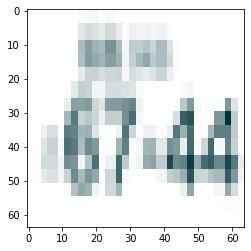

6744
predict : 6744


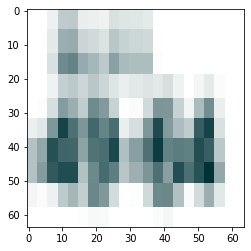

4964
predict : 4964


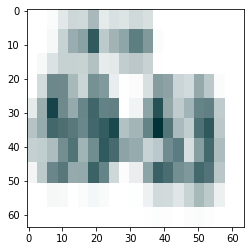

5953
predict : 5953


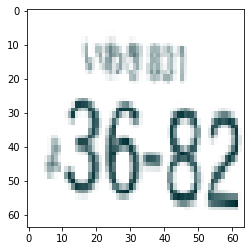

3682
predict : 3682


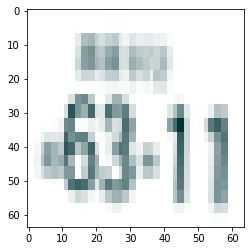

6311
predict : 6311


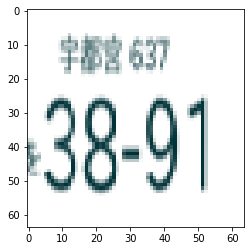

3891
predict : 3891


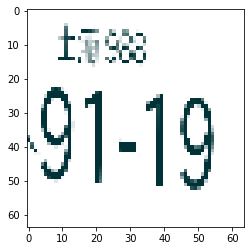

9119
predict : 9119


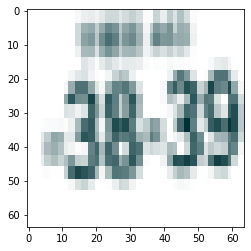

3839
predict : 3839


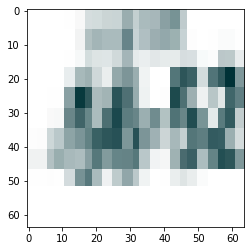

5652
predict : 5652


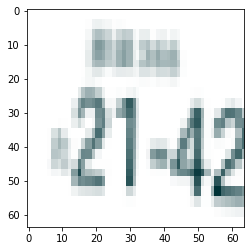

2142
predict : 2142


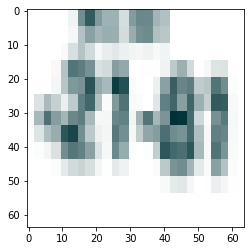

2181
predict : 2181


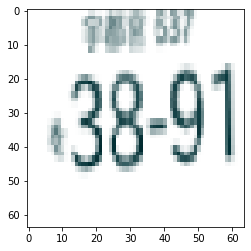

3891
predict : 3891


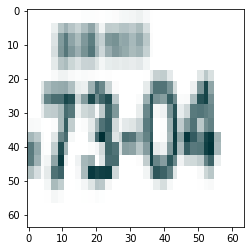

7304
predict : 7304


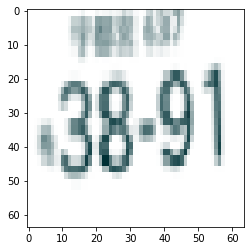

3891
predict : 3891


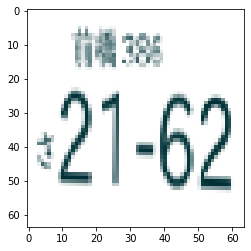

2162
predict : 2162


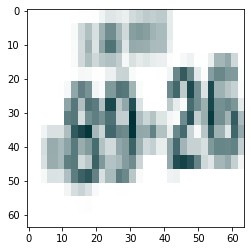

8926
predict : 8926


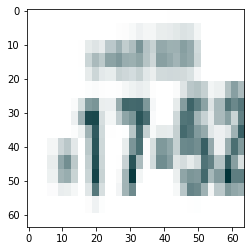

1752
predict : 1752


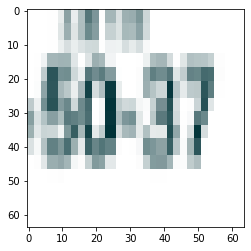

5037
predict : 5037


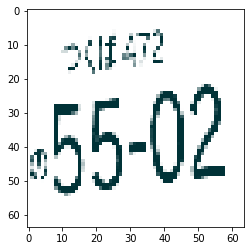

5502
predict : 5502


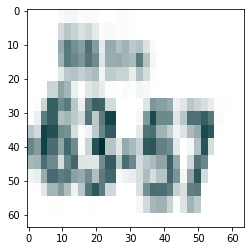

6357
predict : 6357


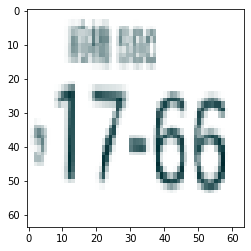

1766
predict : 1766


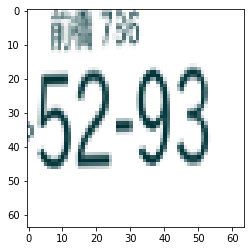

5293
predict : 5293


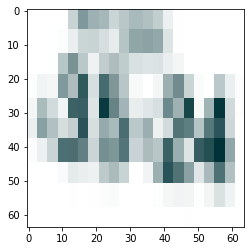

3524
predict : 3524


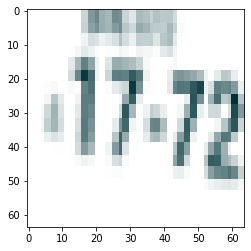

1772
predict : 1772


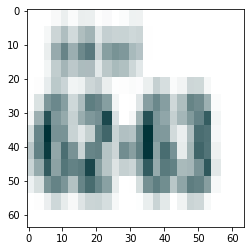

6263
predict : 6263


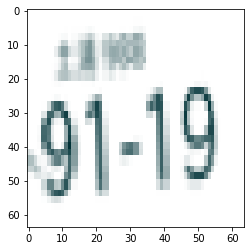

9119
predict : 9119


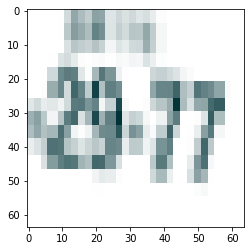

2977
predict : 2977


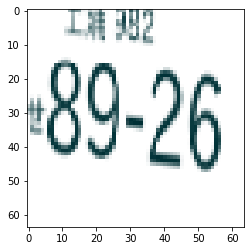

8926
predict : 8926


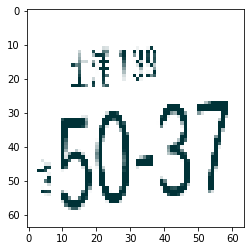

5037
predict : 5037


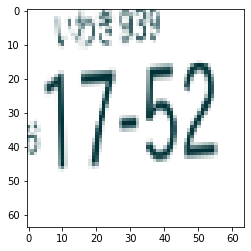

1752
predict : 1752


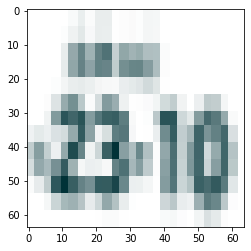

2310
predict : 2310


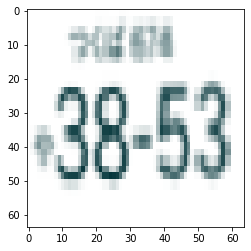

3853
predict : 3853


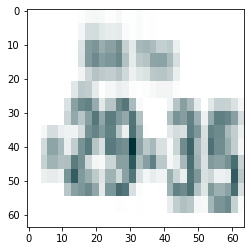

2935
predict : 2935


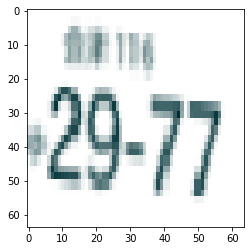

2977
predict : 2977


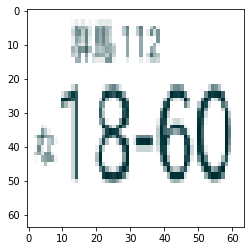

1860
predict : 1860


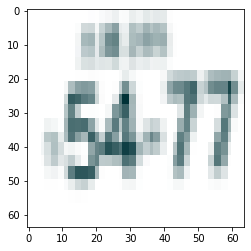

5477
predict : 5477


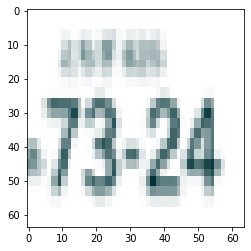

7324
predict : 7324


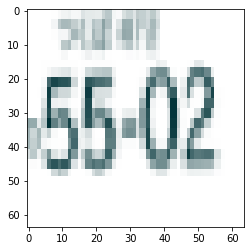

5502
predict : 5502


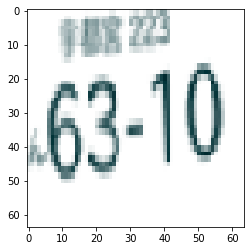

6310
predict : 6310


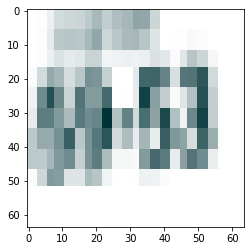

5953
predict : 5953


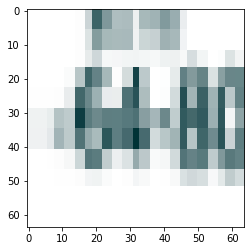

6480
predict : 6480


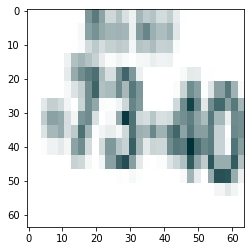

7340
predict : 7340


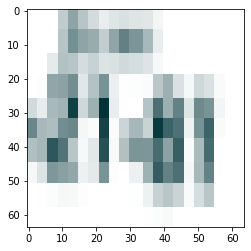

2181
predict : 2181


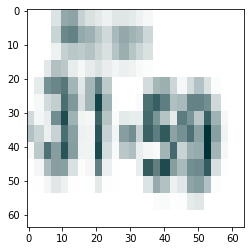

3159
predict : 3159


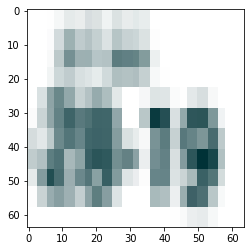

2819
predict : 2819


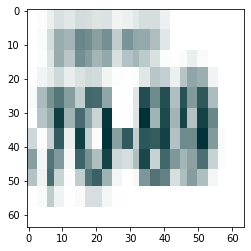

7089
predict : 7089


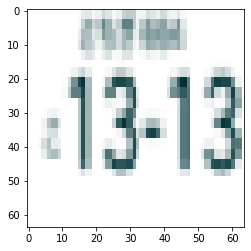

1313
predict : 1313


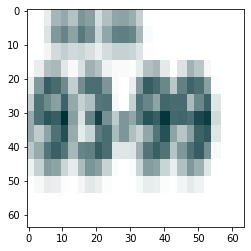

9399
predict : 9399


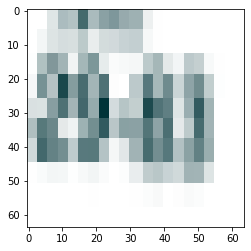

2983
predict : 2983


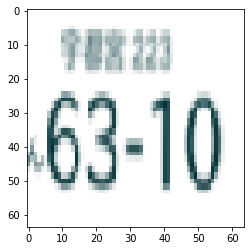

6310
predict : 6310


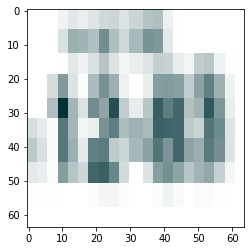

1283
predict : 1283


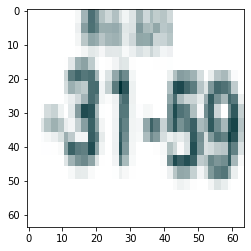

3159
predict : 3159


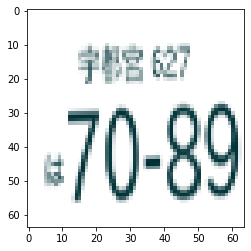

7089
predict : 7089


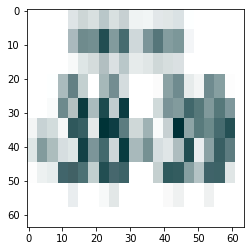

3839
predict : 3839


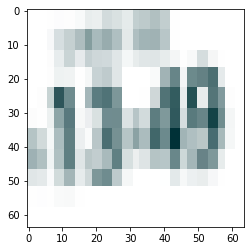

1349
predict : 1349


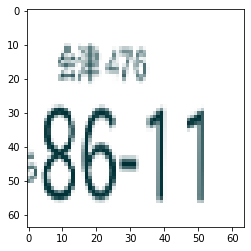

8611
predict : 8611


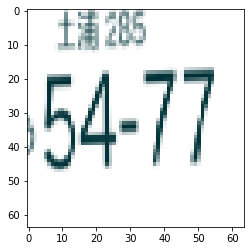

5477
predict : 5477


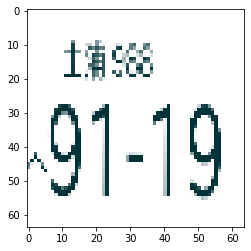

9119
predict : 9119


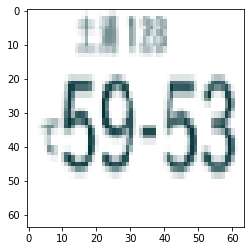

5953
predict : 5953


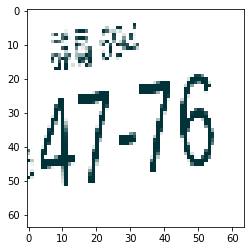

4776
predict : 4776


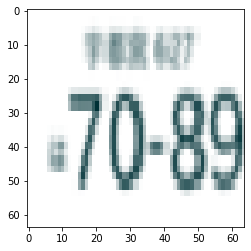

7089
predict : 7089


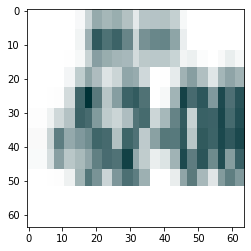

5208
predict : 5208


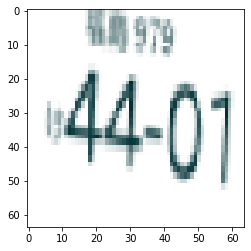

4401
predict : 4401


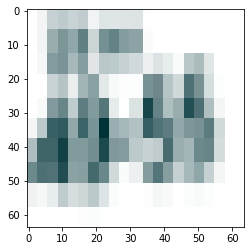

4955
predict : 4955


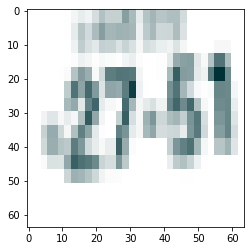

2751
predict : 2751


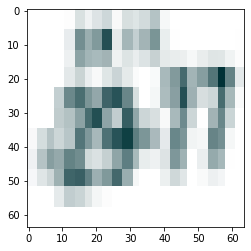

2977
predict : 2977


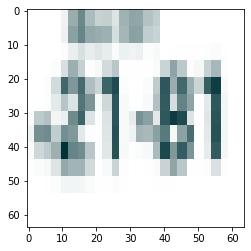

2181
predict : 2181


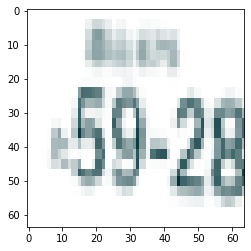

5928
predict : 5928


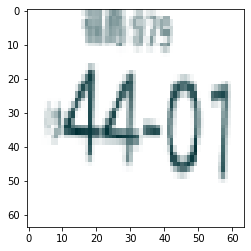

4401
predict : 4401


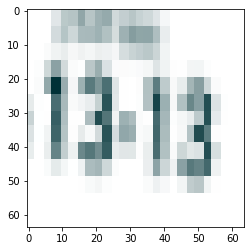

1313
predict : 1313


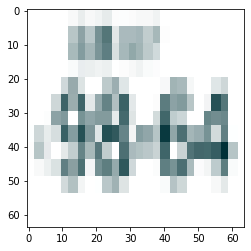

9864
predict : 9864


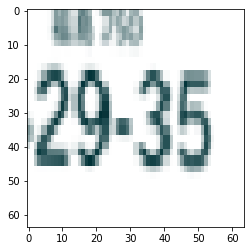

2935
predict : 2935


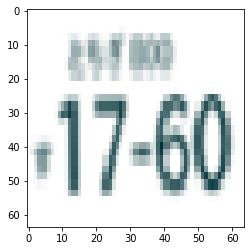

1760
predict : 1760


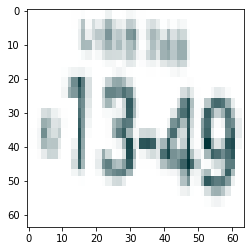

1349
predict : 1349


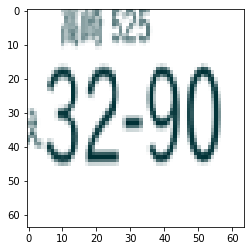

3290
predict : 3290


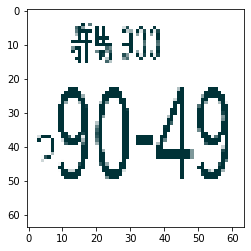

9049
predict : 9049


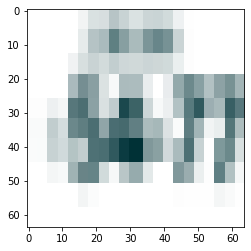

5477
predict : 5477


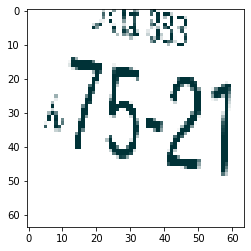

7521
predict : 7521


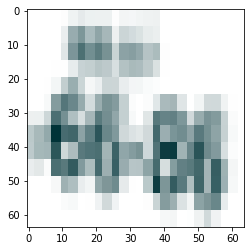

6686
predict : 6686


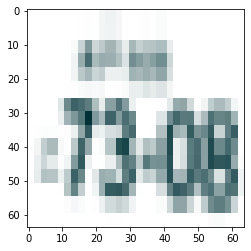

7308
predict : 7308


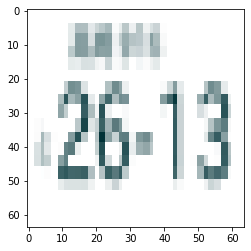

2613
predict : 2613


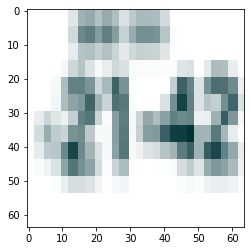

2142
predict : 2142


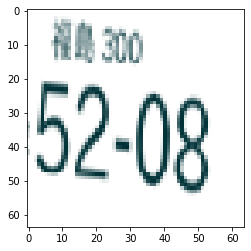

5208
predict : 5208


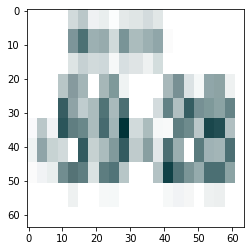

5928
predict : 5928


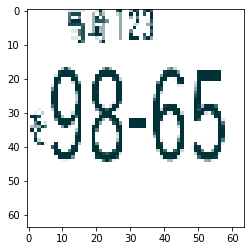

9865
predict : 9865


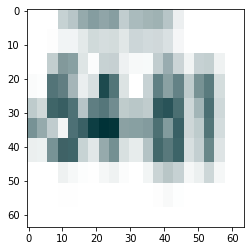

5481
predict : 5481


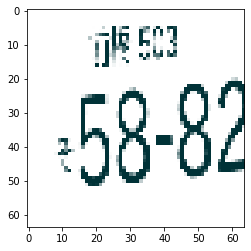

5882
predict : 5882


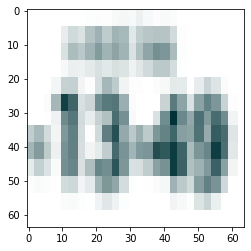

1349
predict : 1349


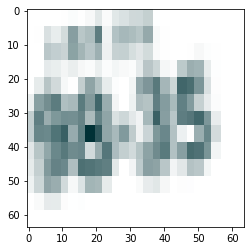

9835
predict : 9835


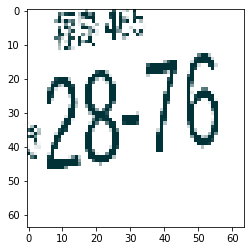

2876
predict : 2819
[!!] Wrong Answer


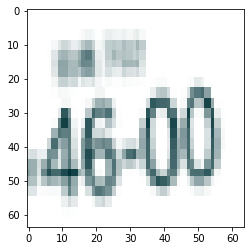

4600
predict : 4600


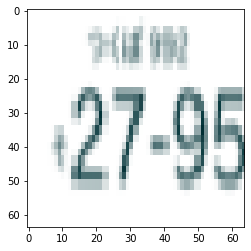

2795
predict : 2795


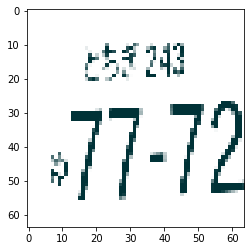

7772
predict : 7772


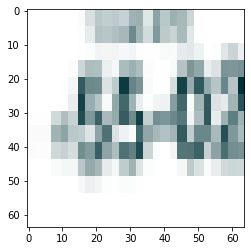

5502
predict : 5502


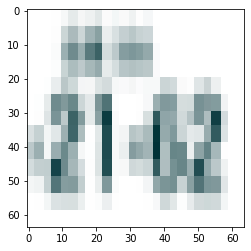

2162
predict : 2162


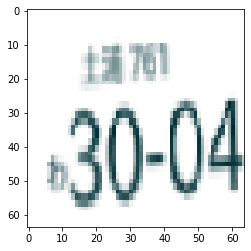

3004
predict : 3004


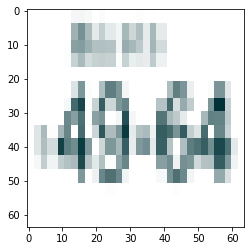

4964
predict : 4964


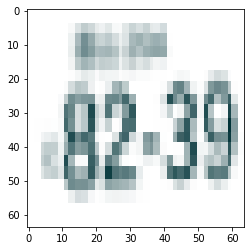

8239
predict : 8239


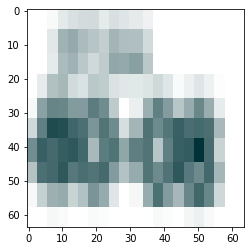

8008
predict : 8008


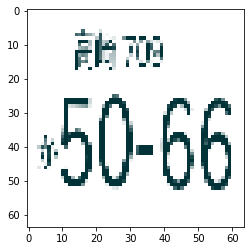

5066
predict : 5066


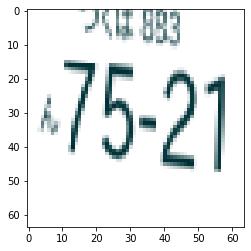

7521
predict : 7521


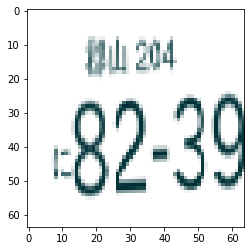

8239
predict : 8239


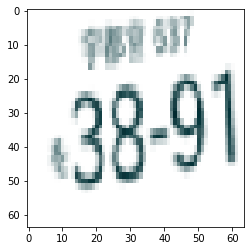

3891
predict : 3891


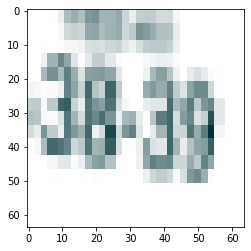

3839
predict : 3839


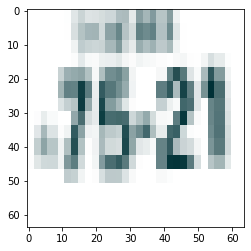

7521
predict : 7521


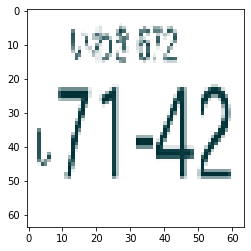

7142
predict : 7142


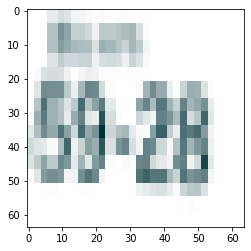

5928
predict : 5928


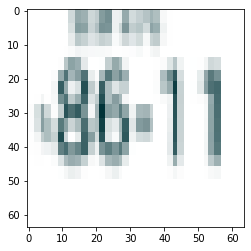

8611
predict : 8611


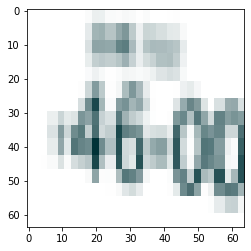

4600
predict : 4600


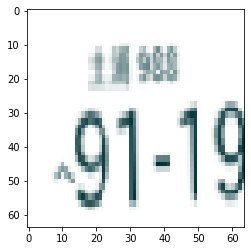

9119
predict : 9119


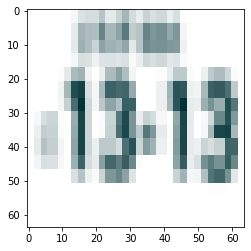

1313
predict : 1313


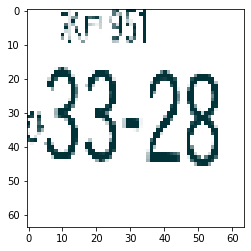

3328
predict : 3328


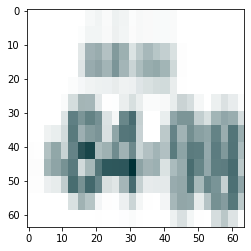

8498
predict : 8498


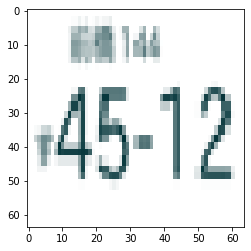

4512
predict : 4512


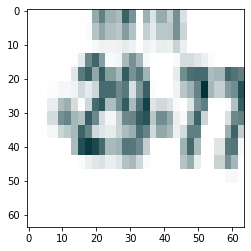

2977
predict : 2977


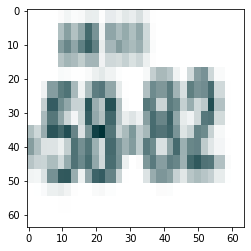

5882
predict : 5882


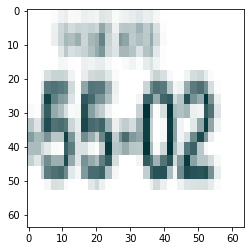

5502
predict : 5502


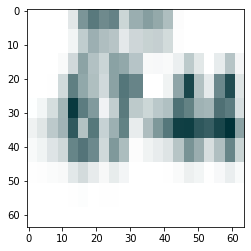

6744
predict : 6744


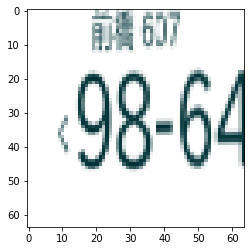

9864
predict : 9864


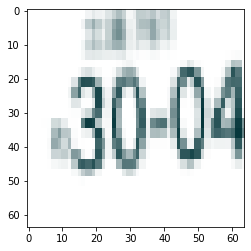

3004
predict : 3004


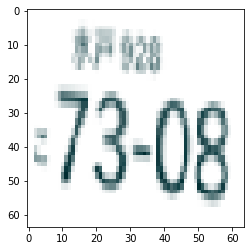

7308
predict : 7308


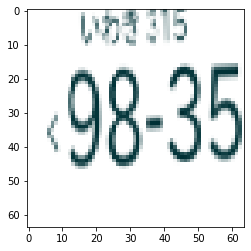

9835
predict : 9835


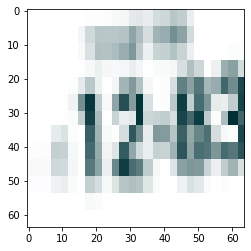

1283
predict : 1283


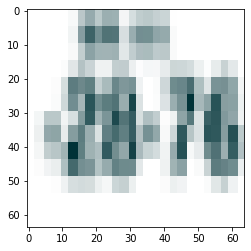

2876
predict : 2876


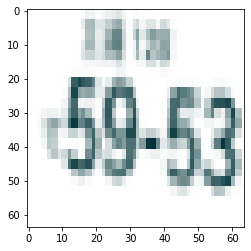

5953
predict : 5953


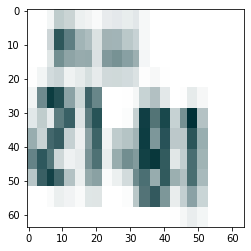

2181
predict : 2181


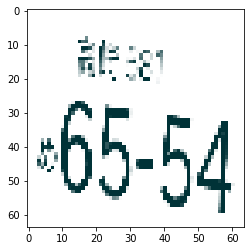

6554
predict : 6662
[!!] Wrong Answer


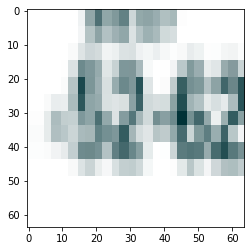

5262
predict : 5262


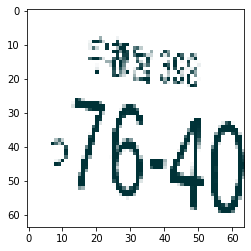

7640
predict : 7640


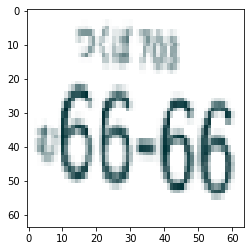

6666
predict : 6666


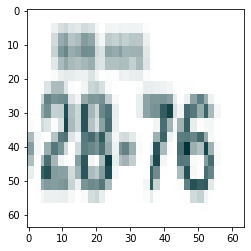

2876
predict : 2876


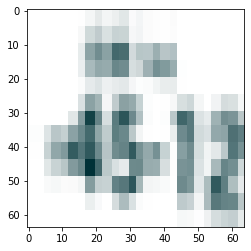

4512
predict : 4512


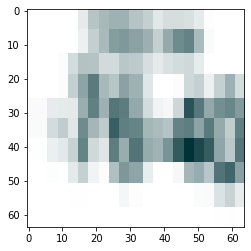

7640
predict : 7640


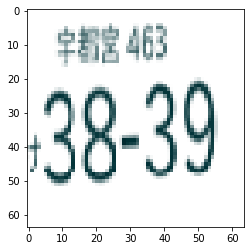

3839
predict : 3839


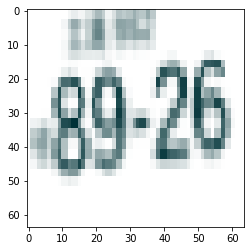

8926
predict : 8926


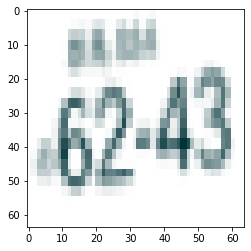

6243
predict : 6243


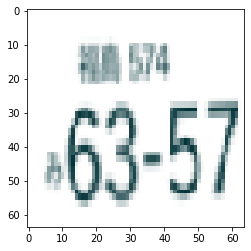

6357
predict : 6357


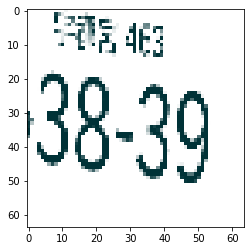

3839
predict : 3839


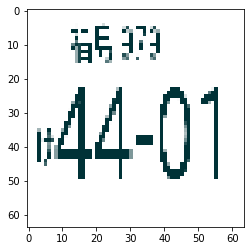

4401
predict : 4401


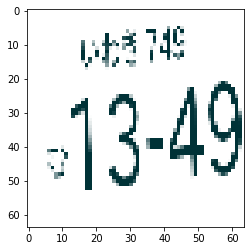

1349
predict : 1349


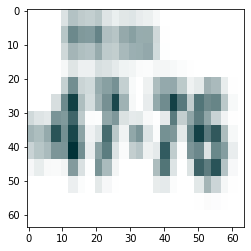

4776
predict : 4776


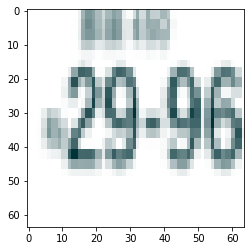

2996
predict : 2996


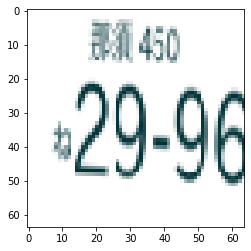

2996
predict : 2996


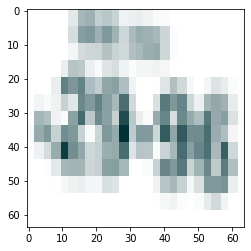

2996
predict : 2996


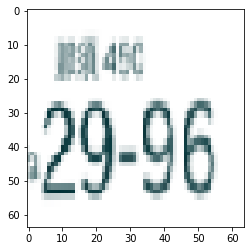

2996
predict : 2996


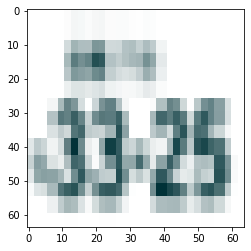

3325
predict : 3325


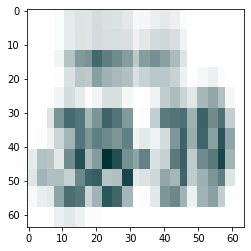

3839
predict : 3839


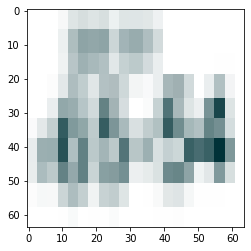

6554
predict : 6554


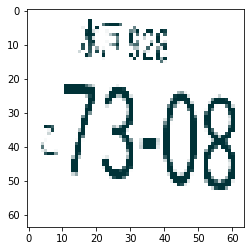

7308
predict : 7308


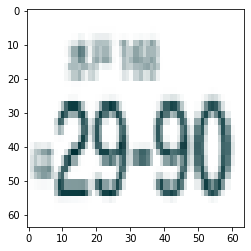

2990
predict : 2990


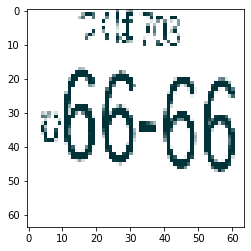

6666
predict : 6666


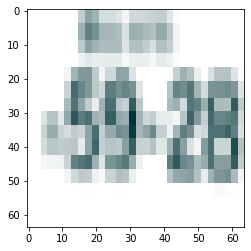

5928
predict : 5928


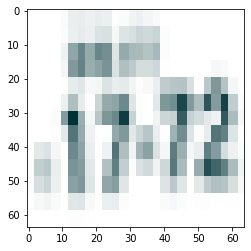

1772
predict : 1772


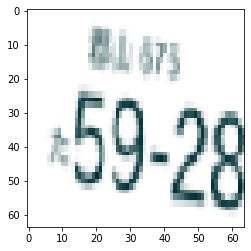

5928
predict : 5928


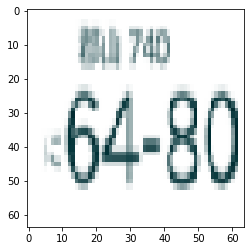

6480
predict : 6480


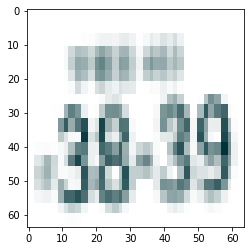

3839
predict : 3839


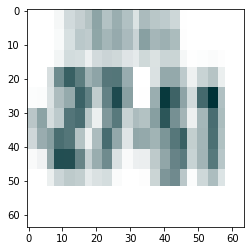

2751
predict : 2751


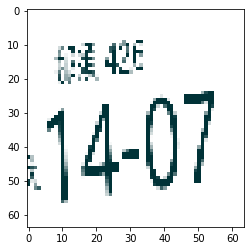

1407
predict : 1407


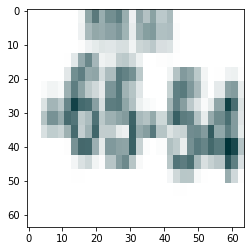

6554
predict : 6554


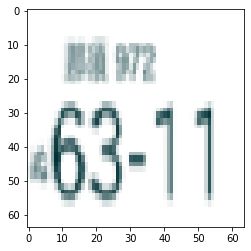

6311
predict : 6311


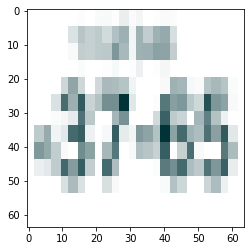

3765
predict : 3765


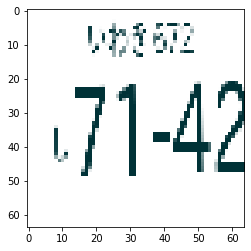

7142
predict : 7142


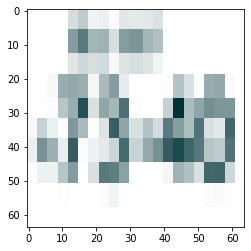

7340
predict : 7340


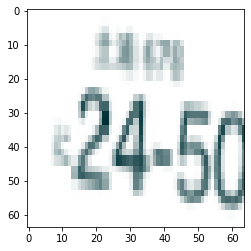

2450
predict : 2450


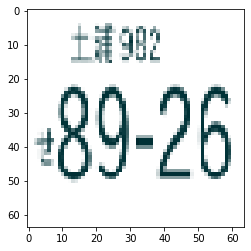

8926
predict : 8926


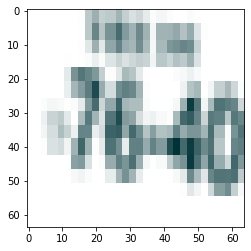

7640
predict : 7640


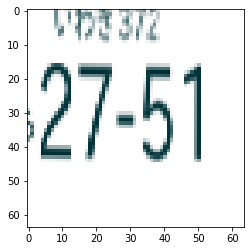

2751
predict : 2751


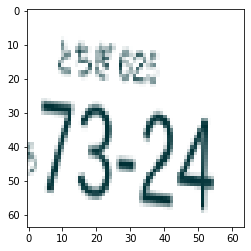

7324
predict : 7324


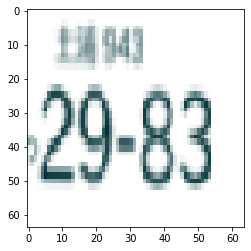

2983
predict : 2983


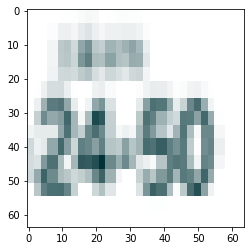

2450
predict : 2450


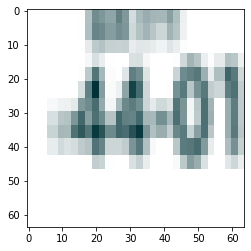

4401
predict : 4401


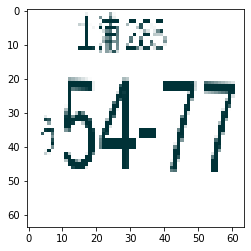

5477
predict : 5477


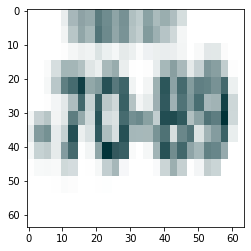

7089
predict : 7089


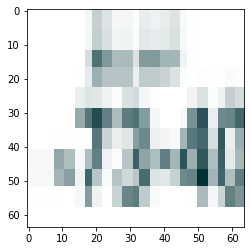

7340
predict : 7340


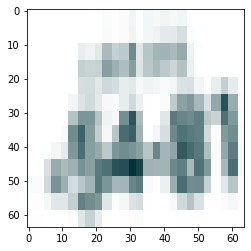

5481
predict : 5481


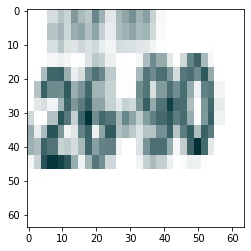

2690
predict : 2690


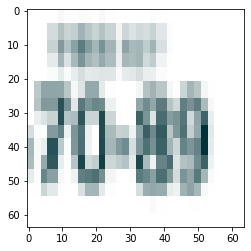

7089
predict : 7089


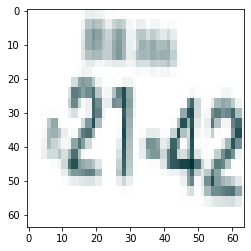

2142
predict : 2142


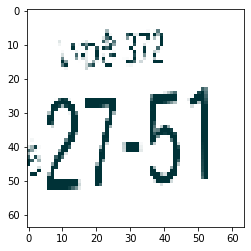

2751
predict : 2751


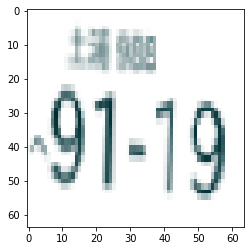

9119
predict : 9119


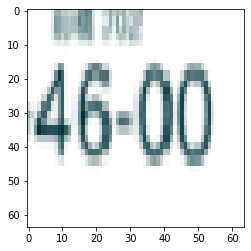

4600
predict : 4600


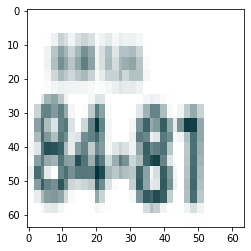

8481
predict : 8481


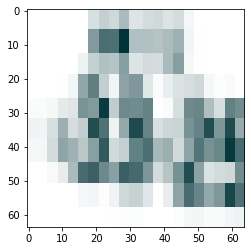

3325
predict : 5208
[!!] Wrong Answer


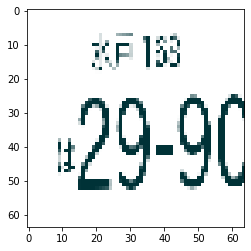

2990
predict : 2996
[!!] Wrong Answer


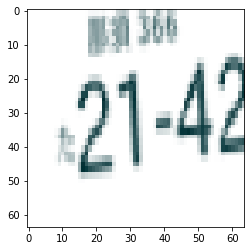

2142
predict : 2181
[!!] Wrong Answer


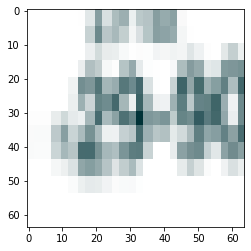

2990
predict : 2996
[!!] Wrong Answer


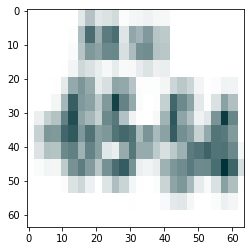

6554
predict : 4964
[!!] Wrong Answer


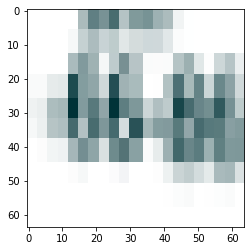

6686
predict : 6696
[!!] Wrong Answer


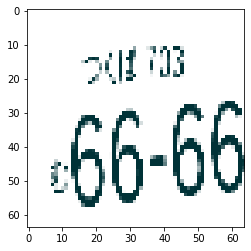

6666
predict : 6696
[!!] Wrong Answer


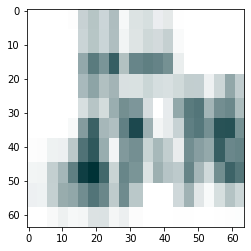

4776
predict : 2996
[!!] Wrong Answer


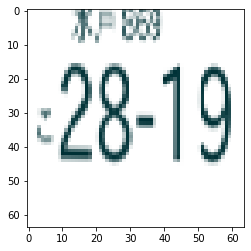

2819
predict : 2613
[!!] Wrong Answer


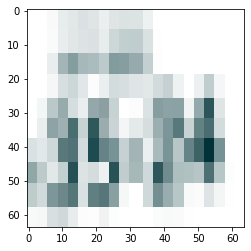

3524
predict : 2935
[!!] Wrong Answer


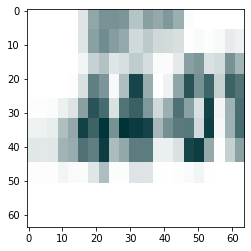

4401
predict : 4601
[!!] Wrong Answer


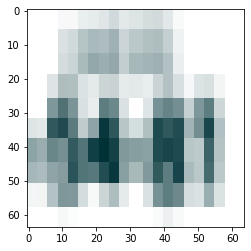

5481
predict : 8481
[!!] Wrong Answer


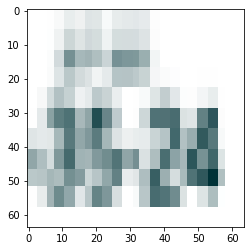

3524
predict : 7324
[!!] Wrong Answer


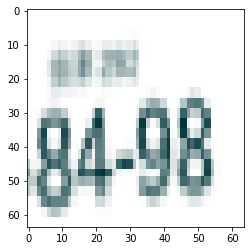

8498
predict : 8008
[!!] Wrong Answer


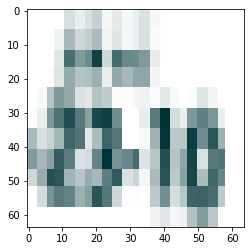

2310
predict : 2876
[!!] Wrong Answer


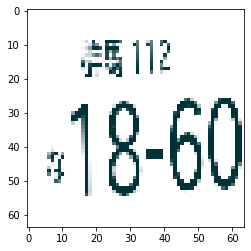

1860
predict : 7886
[!!] Wrong Answer


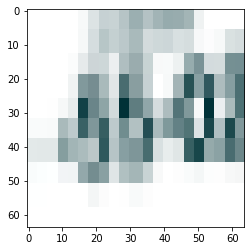

5502
predict : 6696
[!!] Wrong Answer


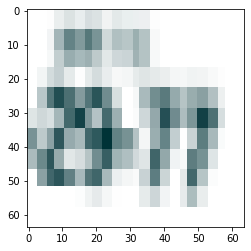

2977
predict : 2613
[!!] Wrong Answer


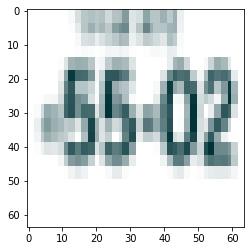

5502
predict : 5882
[!!] Wrong Answer


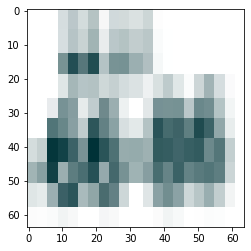

6686
predict : 6696
[!!] Wrong Answer


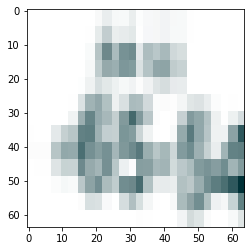

6554
predict : 6662
[!!] Wrong Answer


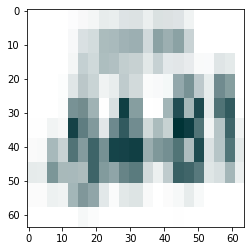

5481
predict : 8481
[!!] Wrong Answer


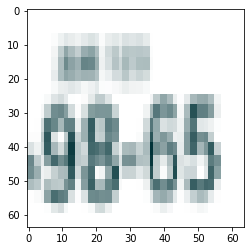

9865
predict : 9864
[!!] Wrong Answer


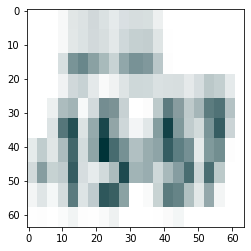

1557
predict : 1407
[!!] Wrong Answer


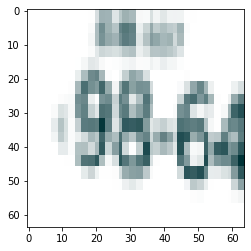

9864
predict : 5882
[!!] Wrong Answer


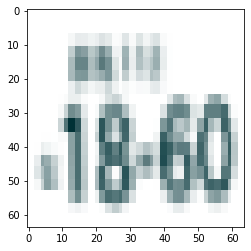

1860
predict : 7886
[!!] Wrong Answer


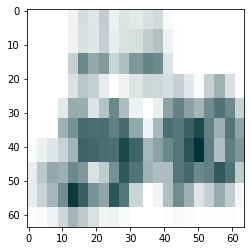

2990
predict : 2996
[!!] Wrong Answer


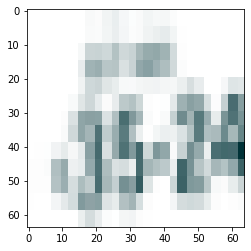

3524
predict : 7324
[!!] Wrong Answer


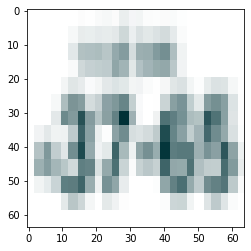

3765
predict : 2795
[!!] Wrong Answer


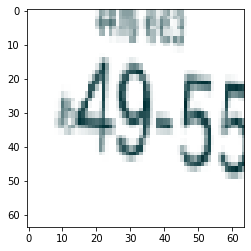

4955
predict : 5953
[!!] Wrong Answer


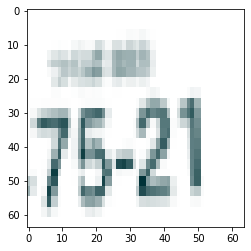

7521
predict : 5037
[!!] Wrong Answer


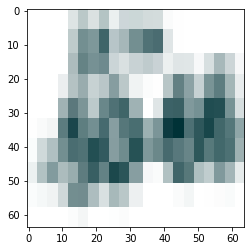

5066
predict : 6696
[!!] Wrong Answer


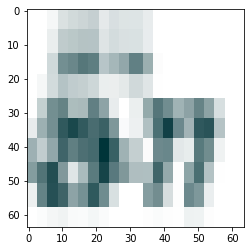

2977
predict : 8611
[!!] Wrong Answer


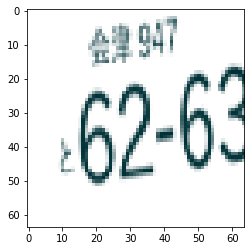

6263
predict : 6243
[!!] Wrong Answer


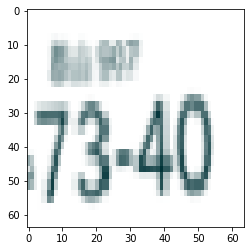

7340
predict : 7142
[!!] Wrong Answer


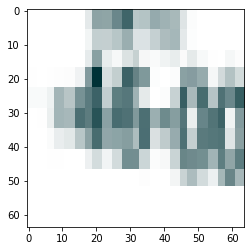

4600
predict : 5502
[!!] Wrong Answer


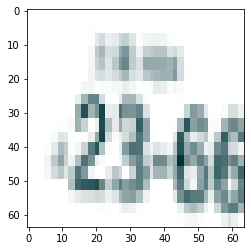

2366
predict : 2162
[!!] Wrong Answer


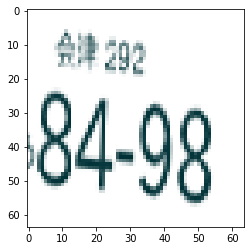

8498
predict : 6480
[!!] Wrong Answer


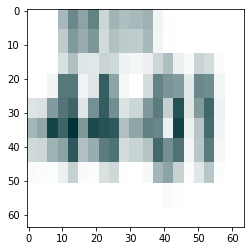

4401
predict : 4601
[!!] Wrong Answer


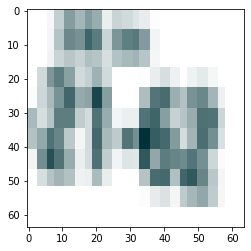

2162
predict : 2142
[!!] Wrong Answer


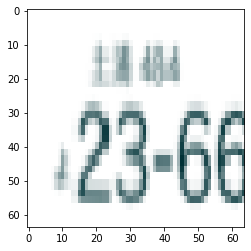

2366
predict : 7340
[!!] Wrong Answer


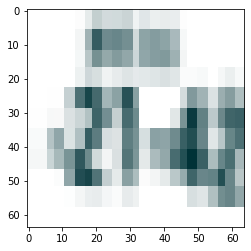

2142
predict : 2162
[!!] Wrong Answer


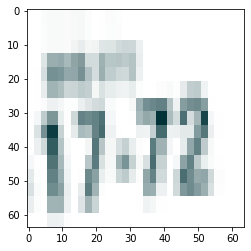

1772
predict : 7772
[!!] Wrong Answer


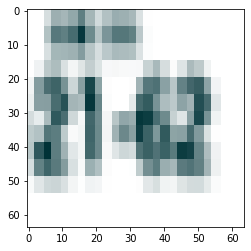

2162
predict : 2142
[!!] Wrong Answer


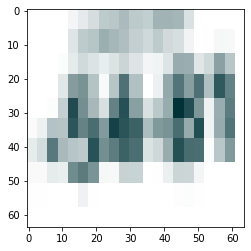

5481
predict : 8481
[!!] Wrong Answer


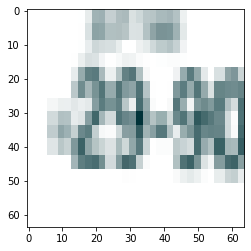

2990
predict : 2996
[!!] Wrong Answer


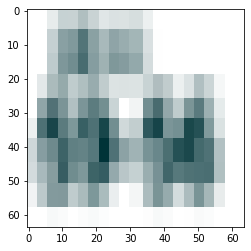

5956
predict : 6696
[!!] Wrong Answer


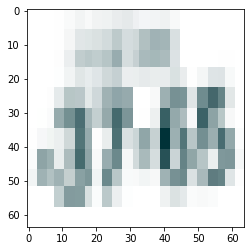

3765
predict : 2795
[!!] Wrong Answer


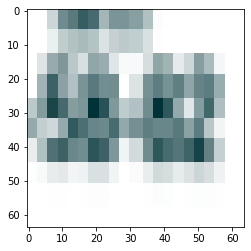

5882
predict : 3682
[!!] Wrong Answer


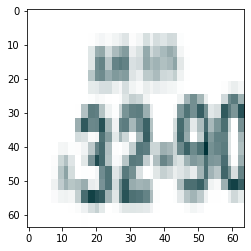

3290
predict : 2996
[!!] Wrong Answer


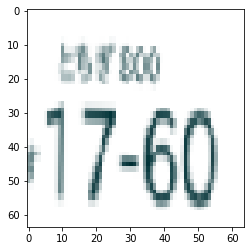

1760
predict : 1752
[!!] Wrong Answer


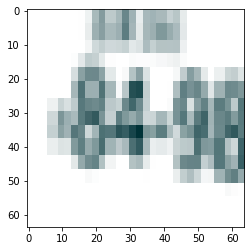

8498
predict : 6696
[!!] Wrong Answer


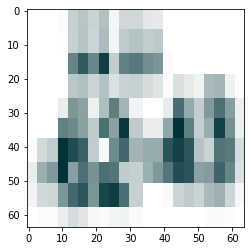

6243
predict : 6263
[!!] Wrong Answer


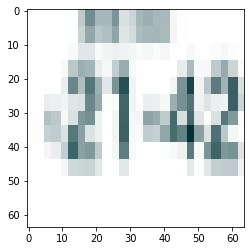

2142
predict : 8143
[!!] Wrong Answer


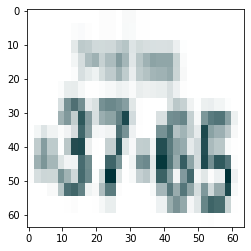

3765
predict : 2795
[!!] Wrong Answer


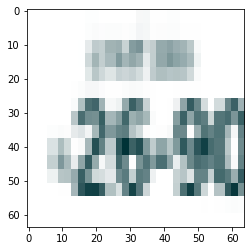

2690
predict : 2996
[!!] Wrong Answer


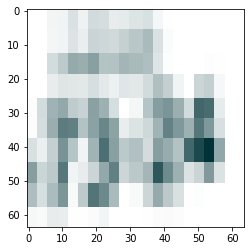

7324
predict : 7304
[!!] Wrong Answer


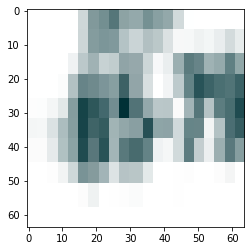

8579
predict : 5037
[!!] Wrong Answer


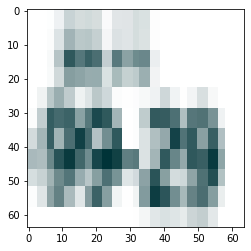

9929
predict : 2935
[!!] Wrong Answer


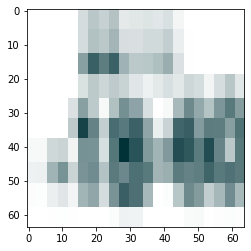

1860
predict : 7886
[!!] Wrong Answer


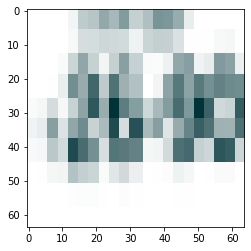

2690
predict : 3853
[!!] Wrong Answer


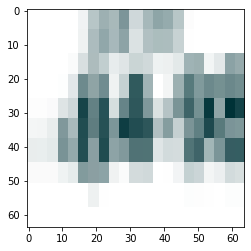

8498
predict : 6696
[!!] Wrong Answer


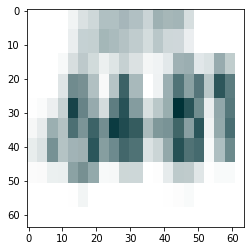

5481
predict : 8481
[!!] Wrong Answer


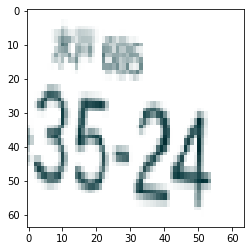

3524
predict : 7324
[!!] Wrong Answer


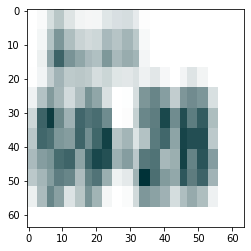

5928
predict : 6696
[!!] Wrong Answer


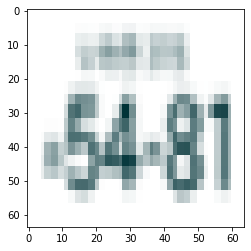

5481
predict : 8481
[!!] Wrong Answer


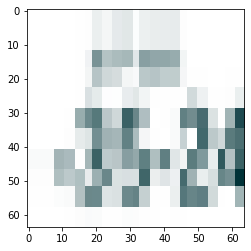

3524
predict : 3328
[!!] Wrong Answer


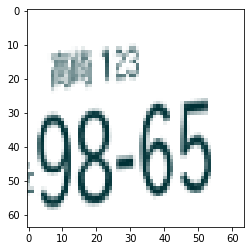

9865
predict : 9864
[!!] Wrong Answer


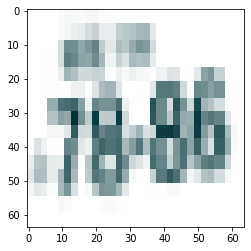

7886
predict : 7089
[!!] Wrong Answer


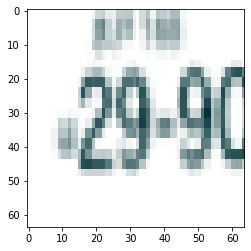

2990
predict : 2996
[!!] Wrong Answer


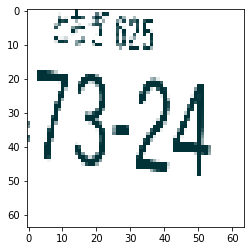

7324
predict : 3524
[!!] Wrong Answer


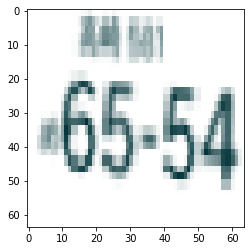

6554
predict : 4964
[!!] Wrong Answer


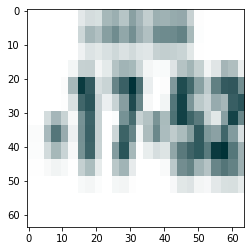

1752
predict : 1760
[!!] Wrong Answer


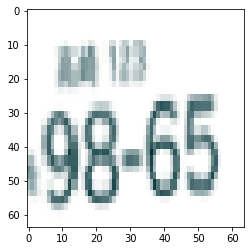

9865
predict : 6666
[!!] Wrong Answer


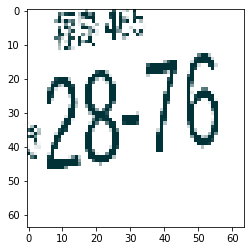

2876
predict : 2819
[!!] Wrong Answer


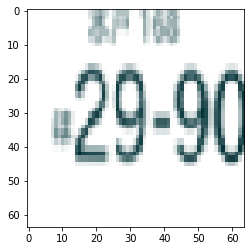

2990
predict : 2690
[!!] Wrong Answer


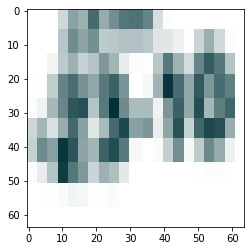

2310
predict : 8579
[!!] Wrong Answer


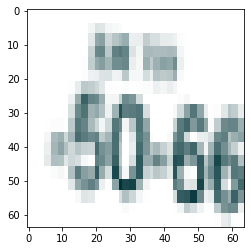

5066
predict : 5262
[!!] Wrong Answer


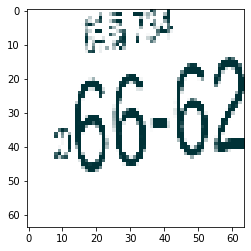

6662
predict : 6696
[!!] Wrong Answer


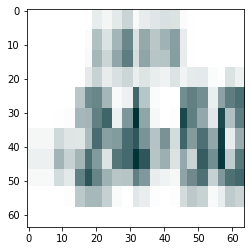

2450
predict : 2498
[!!] Wrong Answer


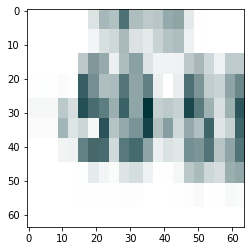

5953
predict : 2983
[!!] Wrong Answer


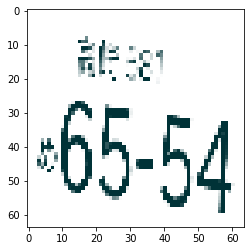

6554
predict : 6662
[!!] Wrong Answer


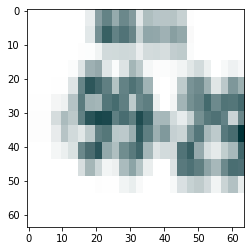

9929
predict : 2935
[!!] Wrong Answer


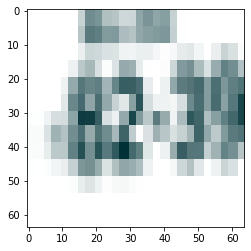

8239
predict : 5037
[!!] Wrong Answer


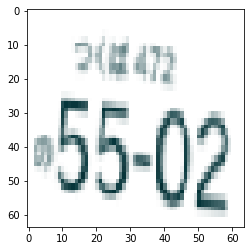

5502
predict : 5953
[!!] Wrong Answer


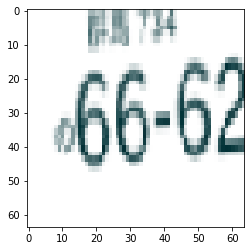

6662
predict : 6696
[!!] Wrong Answer


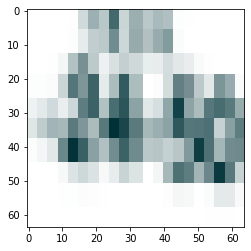

2450
predict : 6662
[!!] Wrong Answer


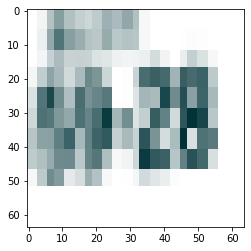

5928
predict : 9929
[!!] Wrong Answer


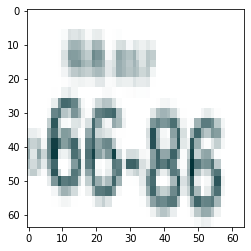

6686
predict : 6662
[!!] Wrong Answer


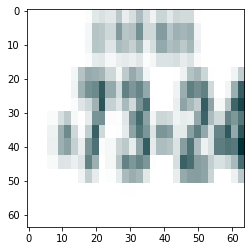

7324
predict : 7772
[!!] Wrong Answer


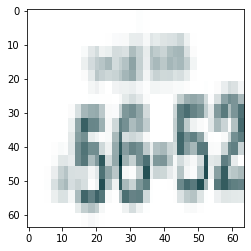

5652
predict : 5953
[!!] Wrong Answer
Accuracy: 3539/3630=0.974931129476584


In [10]:
c = x_test.shape[0]

y_test_axis1 = np.argmax(y_test, axis=1)

# random output
for i in range(0, c, 10):
    plt.imshow(array_to_img(x_test[i]))
    plt.show()
    print(number_list[y_test_axis1[i]])
    print("predict : " + number_list[predict_classes[i]])
    if (y_test_axis1[i] != predict_classes[i]):
        print("[!!] Wrong Answer")
        
# Wrong Answer
w_count = 0
for i in range(c):
    if (y_test_axis1[i] != predict_classes[i]):
        plt.imshow(array_to_img(x_test[i]))
        plt.show()
        print(number_list[y_test_axis1[i]])
        print("predict : " + number_list[predict_classes[i]])
        print("[!!] Wrong Answer")
        w_count += 1
print("Accuracy: {0}/{1}={2}".format(c-w_count, c, (c-w_count)/float(c)))